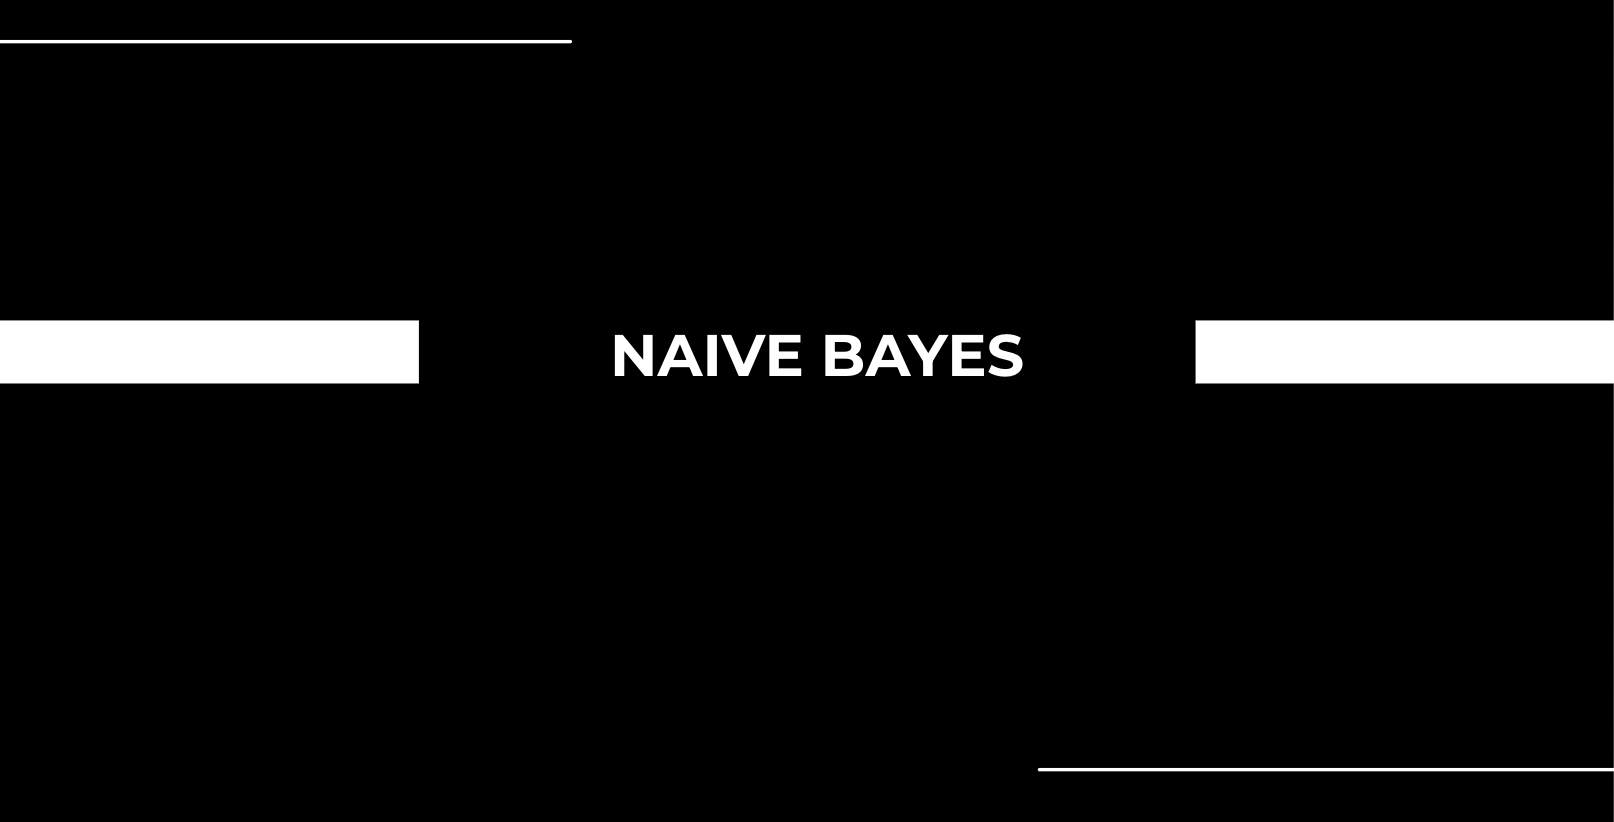

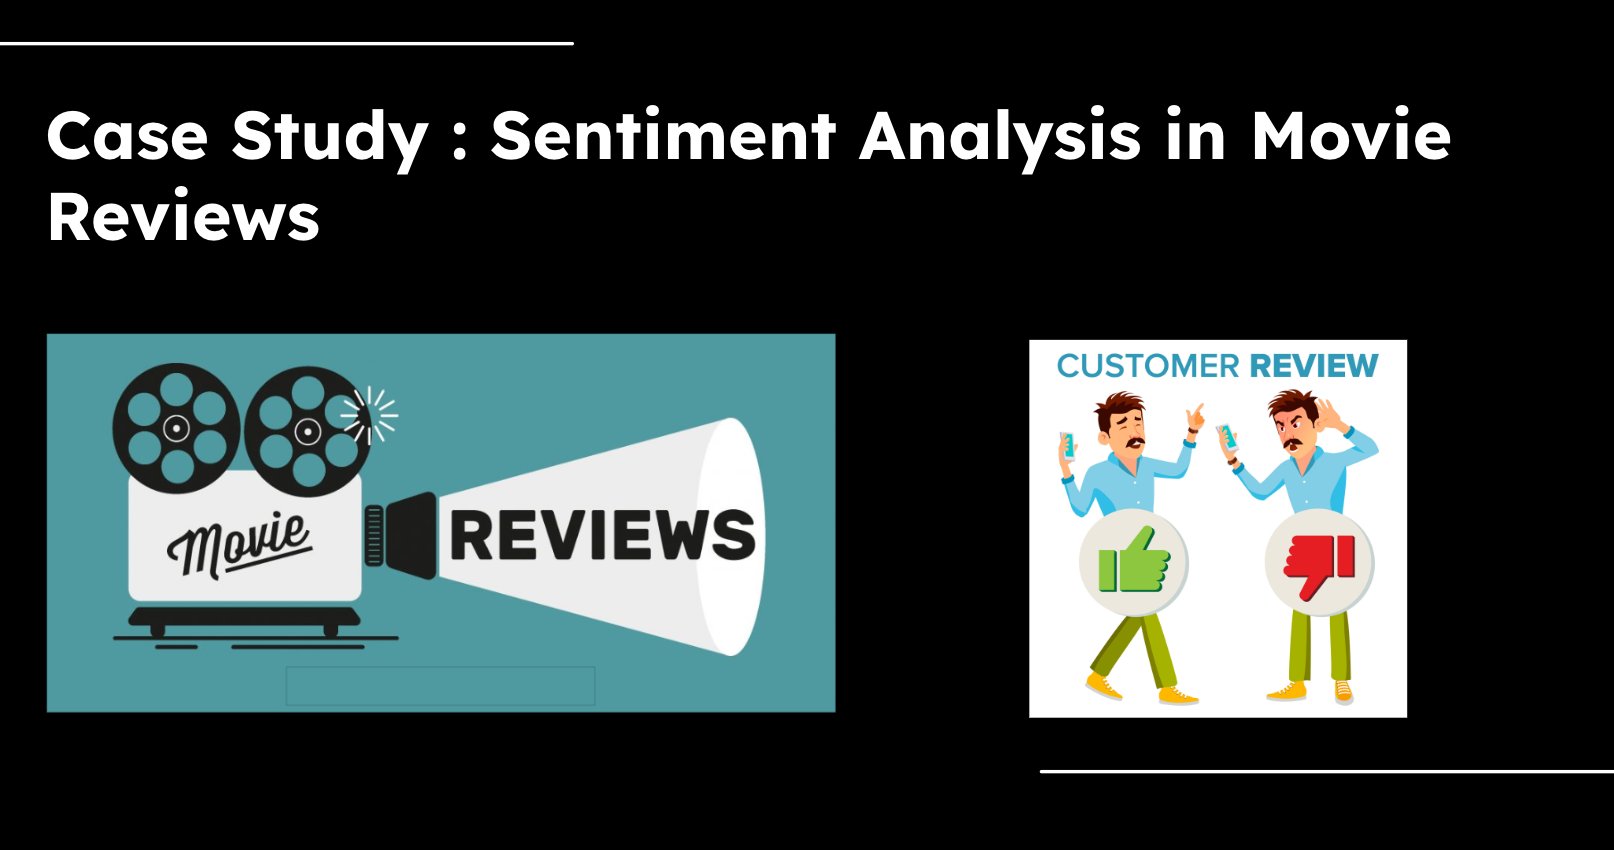

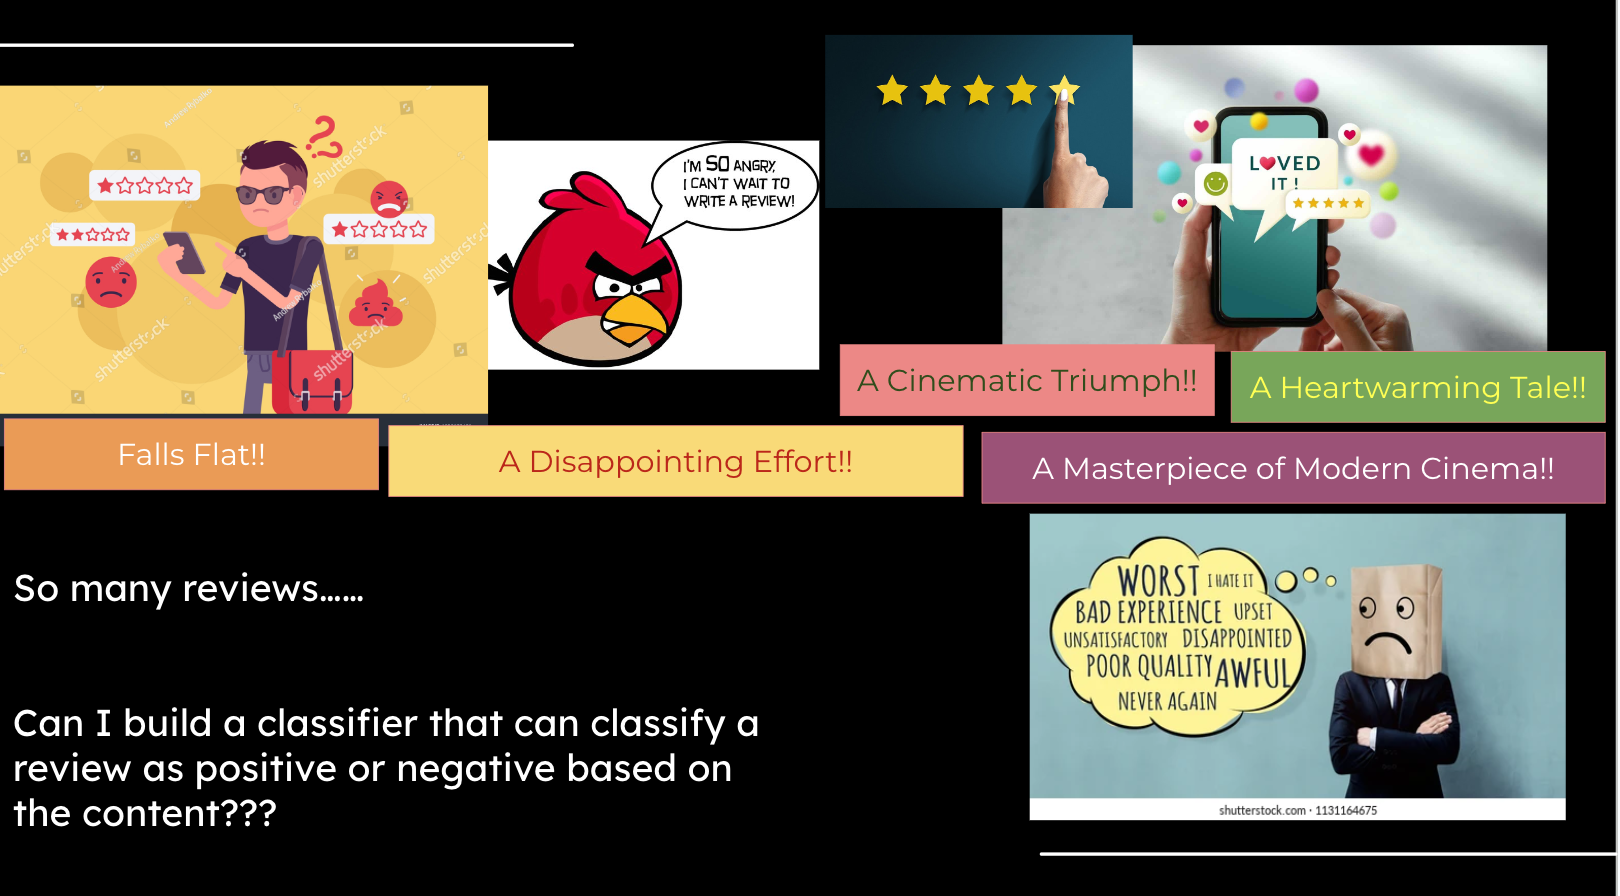

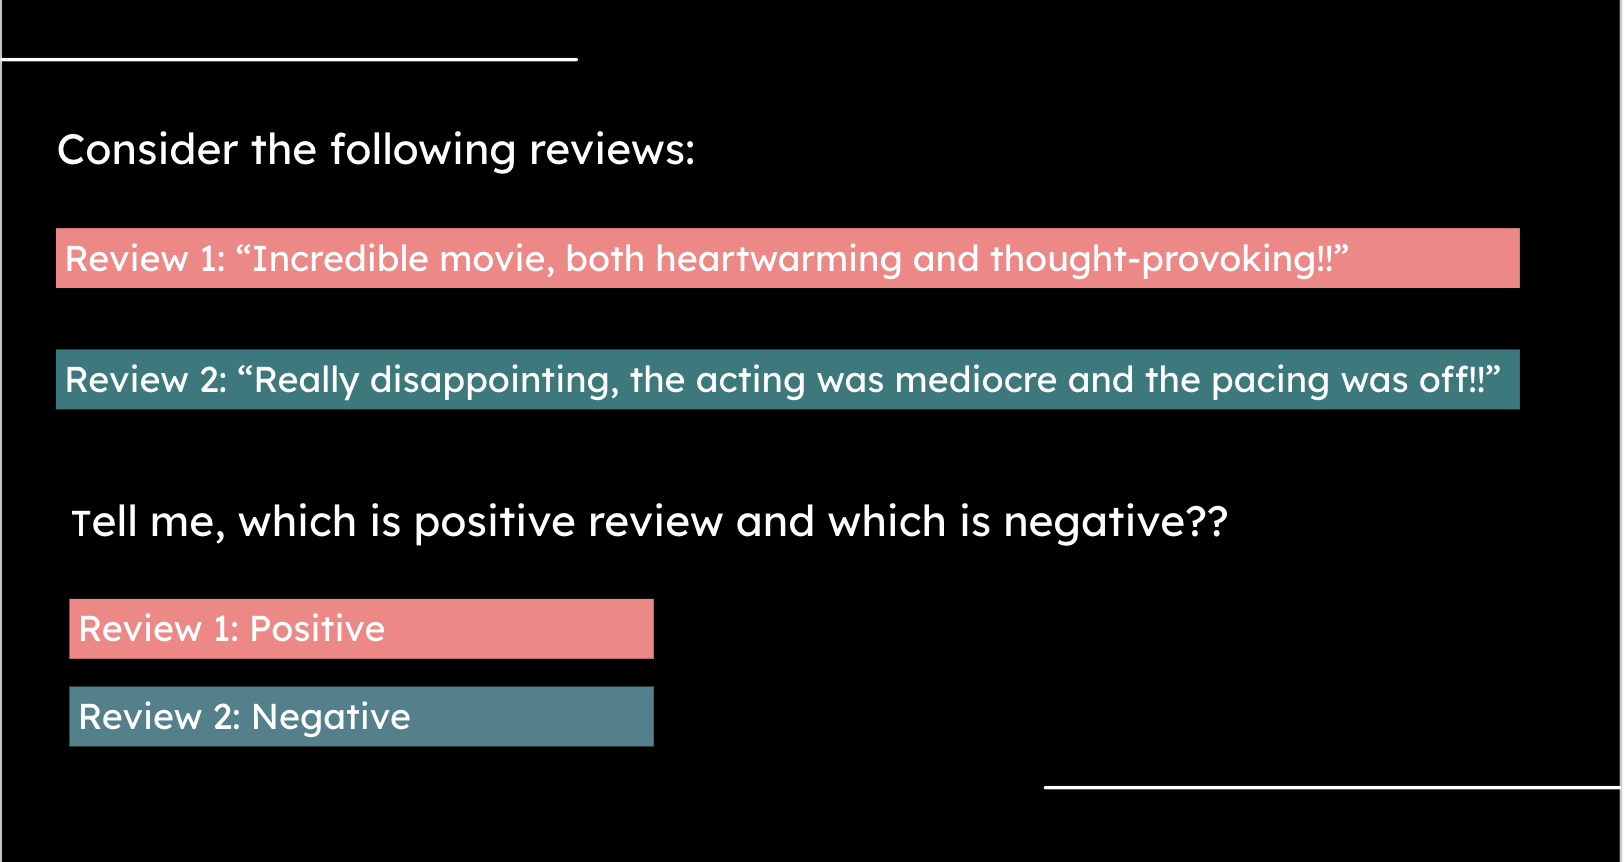

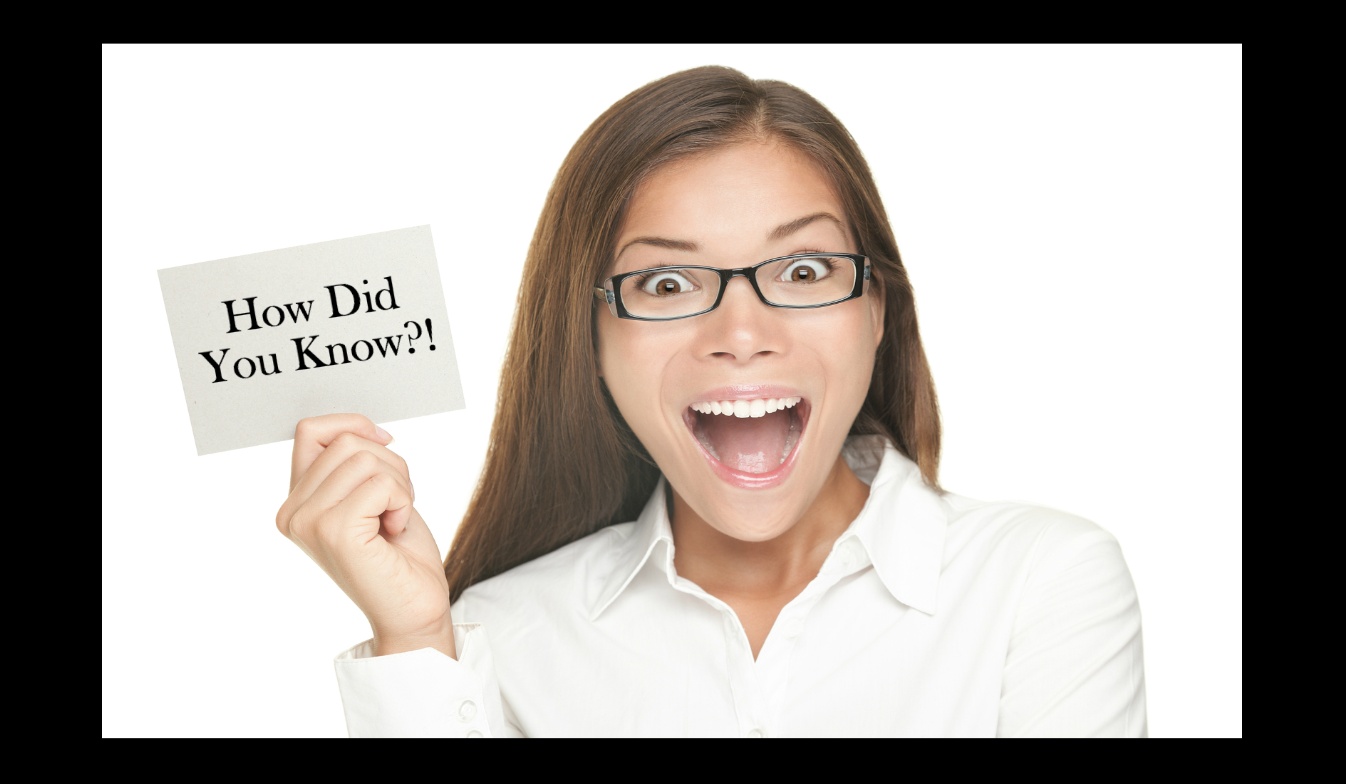

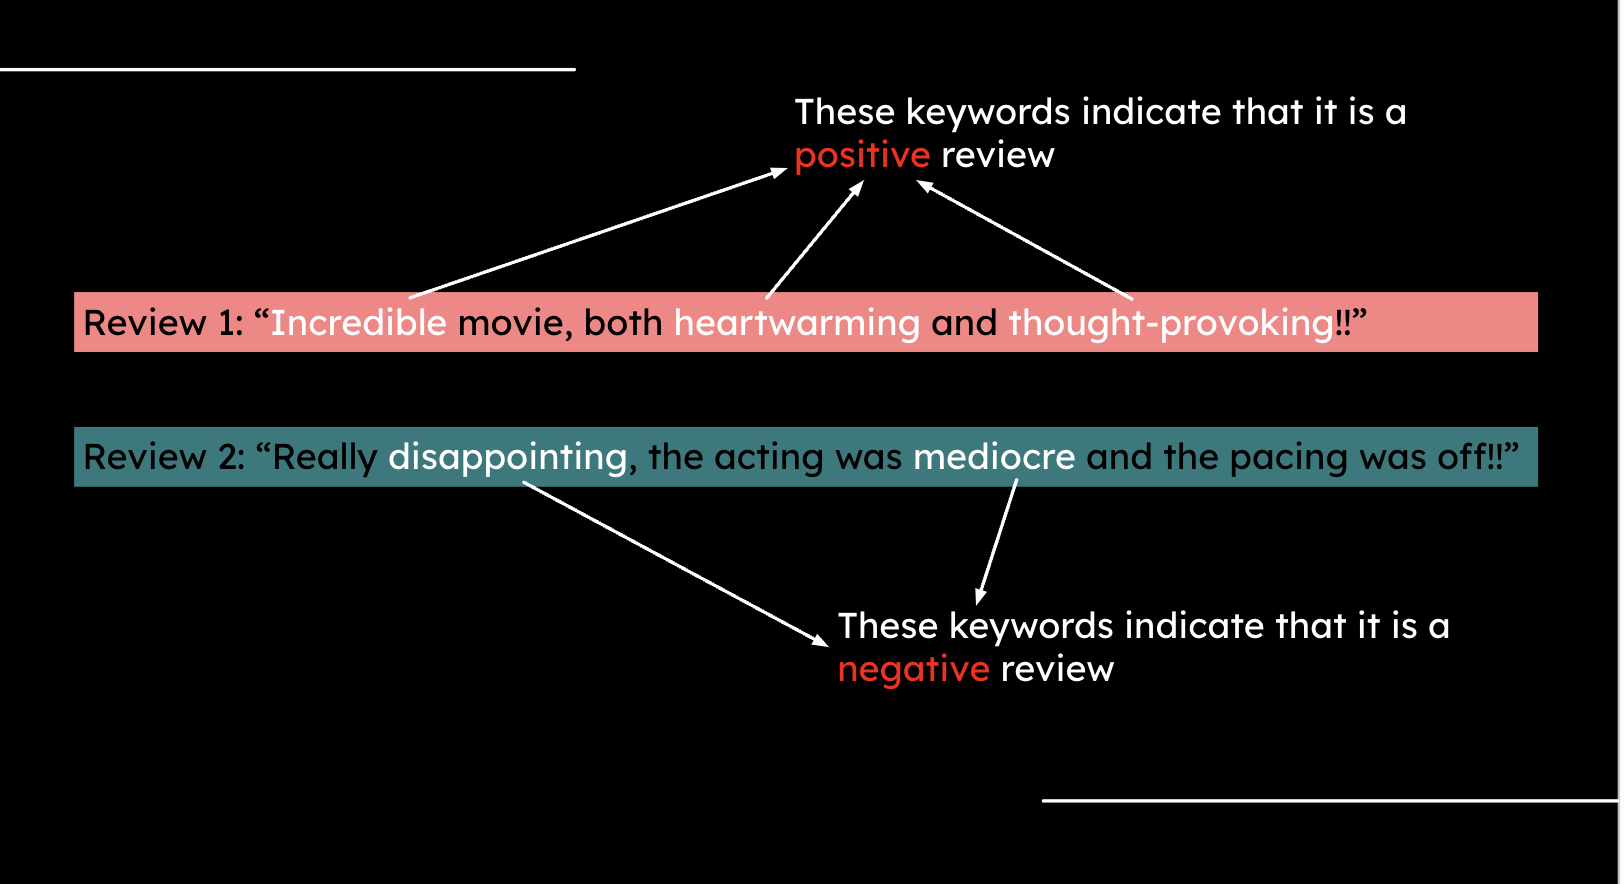

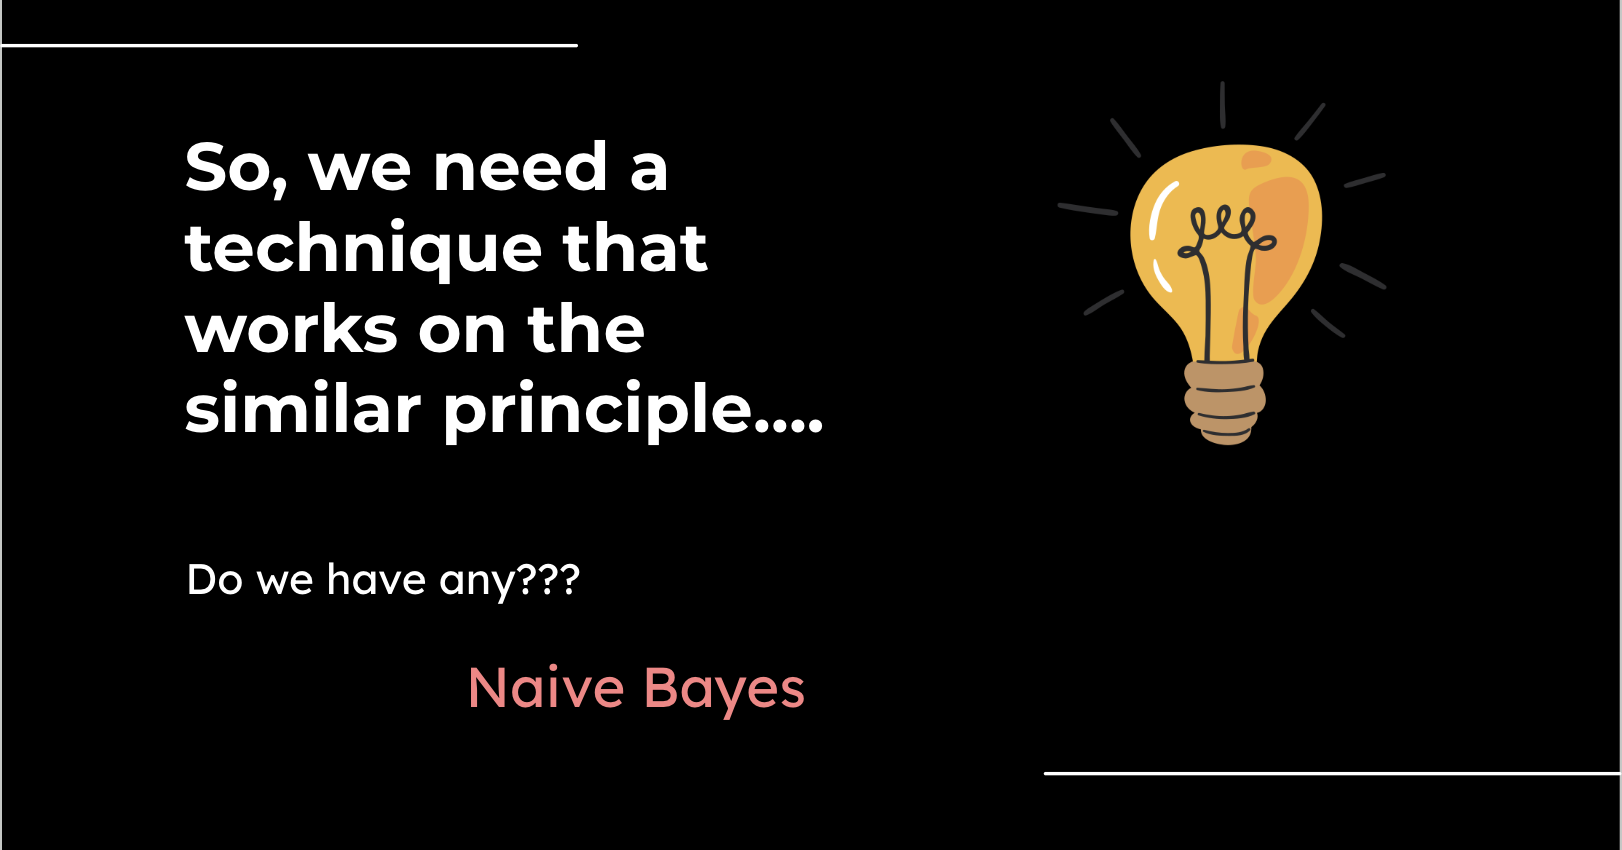

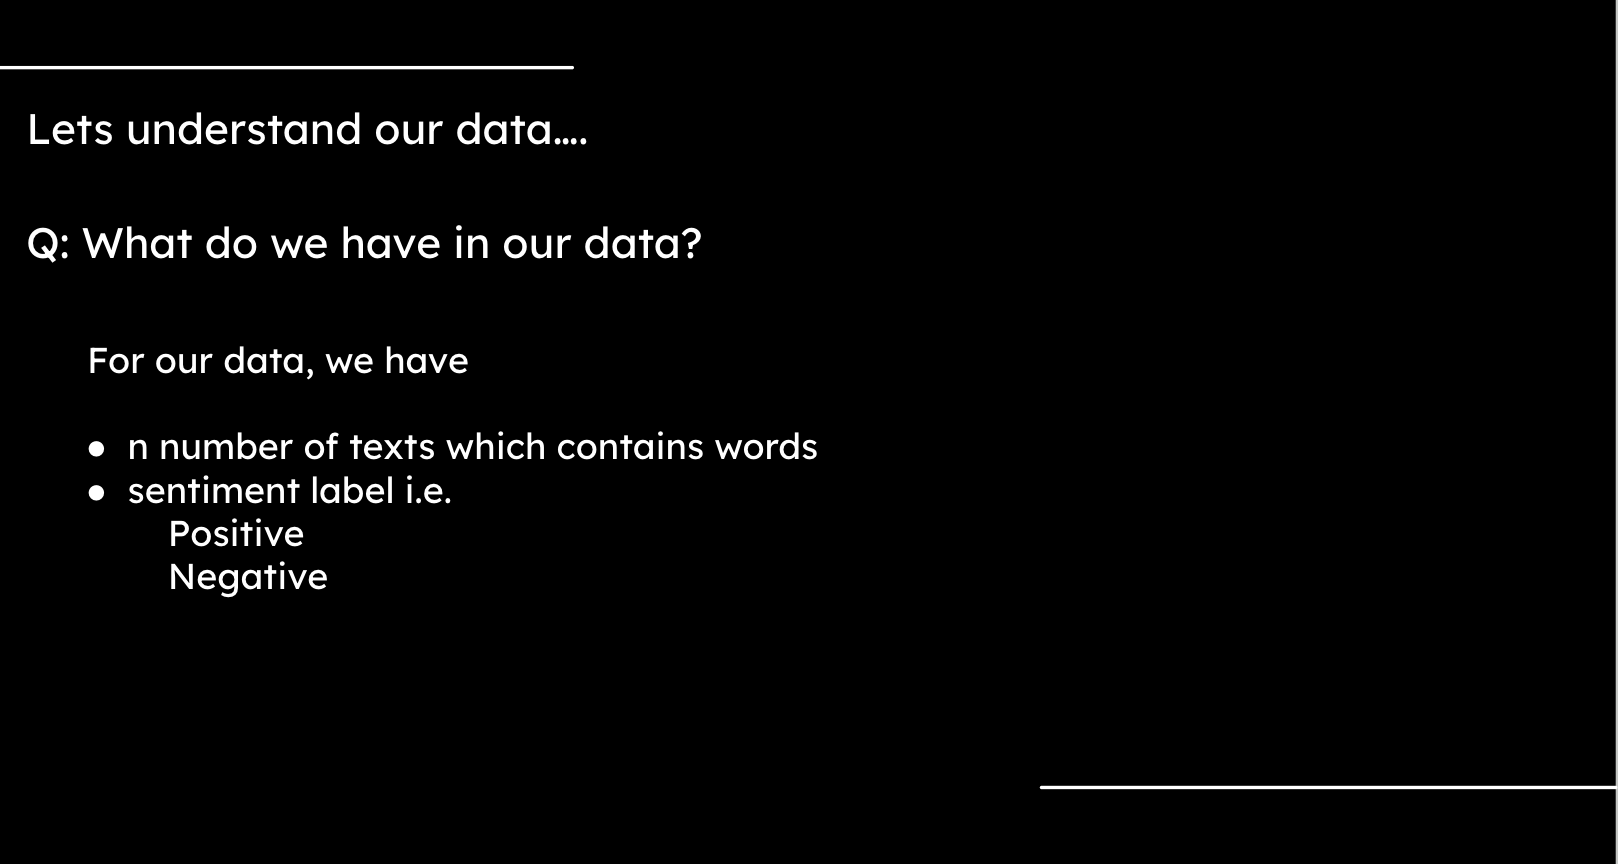

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

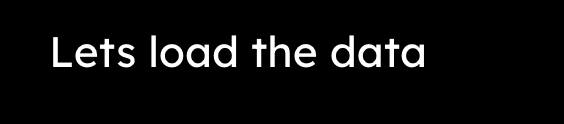

In [ ]:
!gdown 1KHUCHaSLeU4S6l74uir0mnJhBUiTKuGF

Downloading...
From: https://drive.google.com/uc?id=1KHUCHaSLeU4S6l74uir0mnJhBUiTKuGF
To: /content/movie_reviews_sentiment_analysis.csv
100% 257k/257k [00:00<00:00, 18.0MB/s]


In [ ]:
df = pd.read_csv('movie_reviews_sentiment_analysis.csv', encoding='latin-1')
df.head()

Review Sentiment
0             Outstanding in every aspect!  Positive
1             Outstanding in every aspect!  Positive
2  Amazing visuals and great storytelling.  Positive
3              Brilliant acting and story.  Positive
4                   Great movie, loved it!  Positive

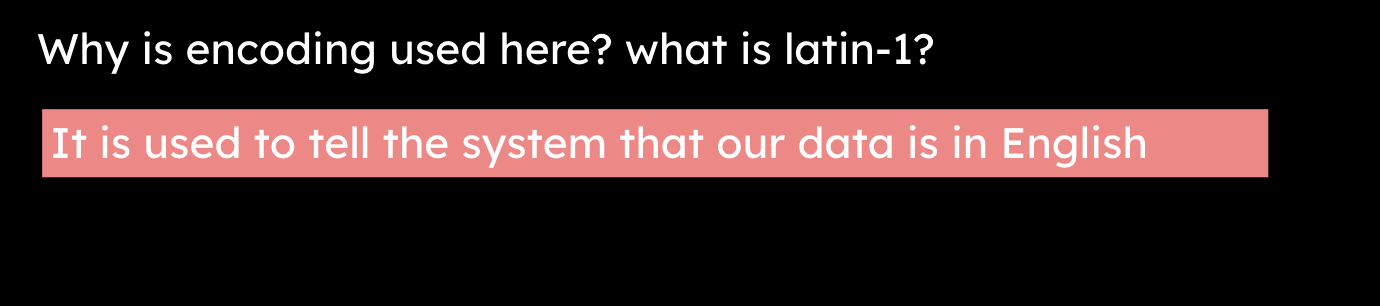

#### Performing EDA

Let's see the distribution of class labels

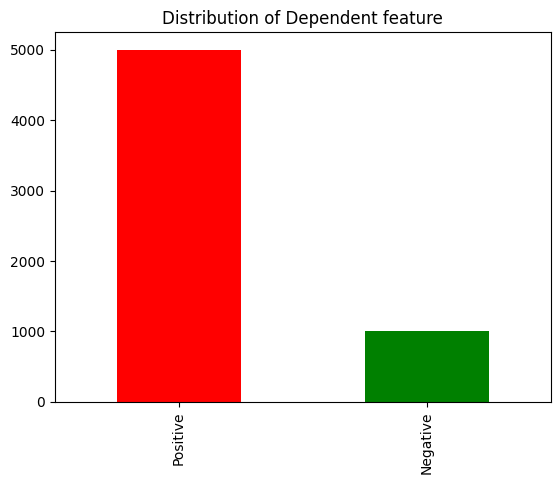

In [ ]:
freq = pd.value_counts(df["Sentiment"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

**Observation**:

As we can see, the number of negative reviews are quite less as compared to the positive reviews

Clearly, we have an **imbalanced data**!

### Preprocessing data

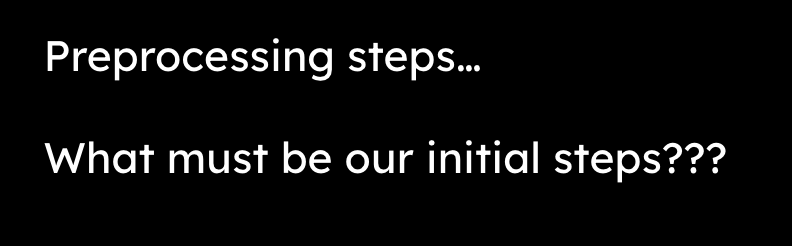

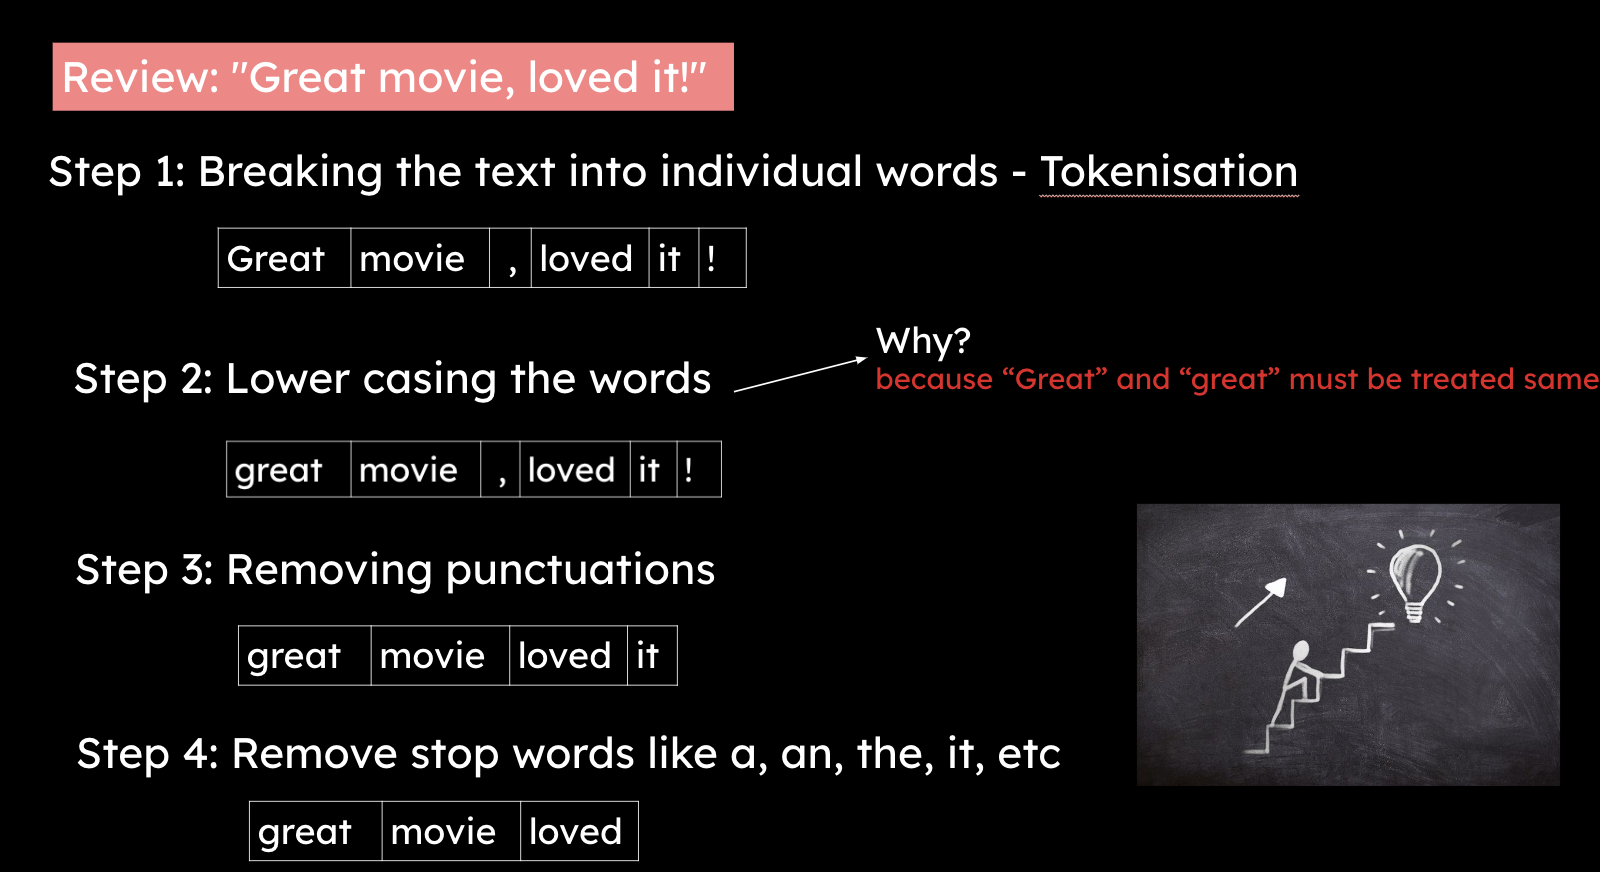

Lets implement all of these text processing using the  [NLTK](https://www.nltk.org/) library

In [ ]:
# Libraries for text processing
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        # Remove punctuations #
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Calling the `clean_tokenized_sentence(s)` function onto each text in our dataset using the **apply** method, and storing them in a new column, `cleaned_message`

In [ ]:
df["cleaned_message"] = df["Review"].apply(clean_tokenized_sentence)
df.head(10)

Review Sentiment  \
0               Outstanding in every aspect!  Positive   
1               Outstanding in every aspect!  Positive   
2    Amazing visuals and great storytelling.  Positive   
3                Brilliant acting and story.  Positive   
4                     Great movie, loved it!  Positive   
5                  Boring and uninteresting.  Negative   
6  Fantastic, thoroughly enjoyed every part!  Positive   
7  Fantastic, thoroughly enjoyed every part!  Positive   
8        Wonderful experience, a must-watch!  Positive   
9                  Boring and uninteresting.  Negative   

                           cleaned_message  
0                 outstanding every aspect  
1                 outstanding every aspect  
2       amazing visuals great storytelling  
3                   brilliant acting story  
4                        great movie loved  
5                     boring uninteresting  
6  fantastic thoroughly enjoyed every part  
7  fantastic thoroughly enjoyed every part  
8           wonderful experience mustwatch  
9                     boring uninteresting

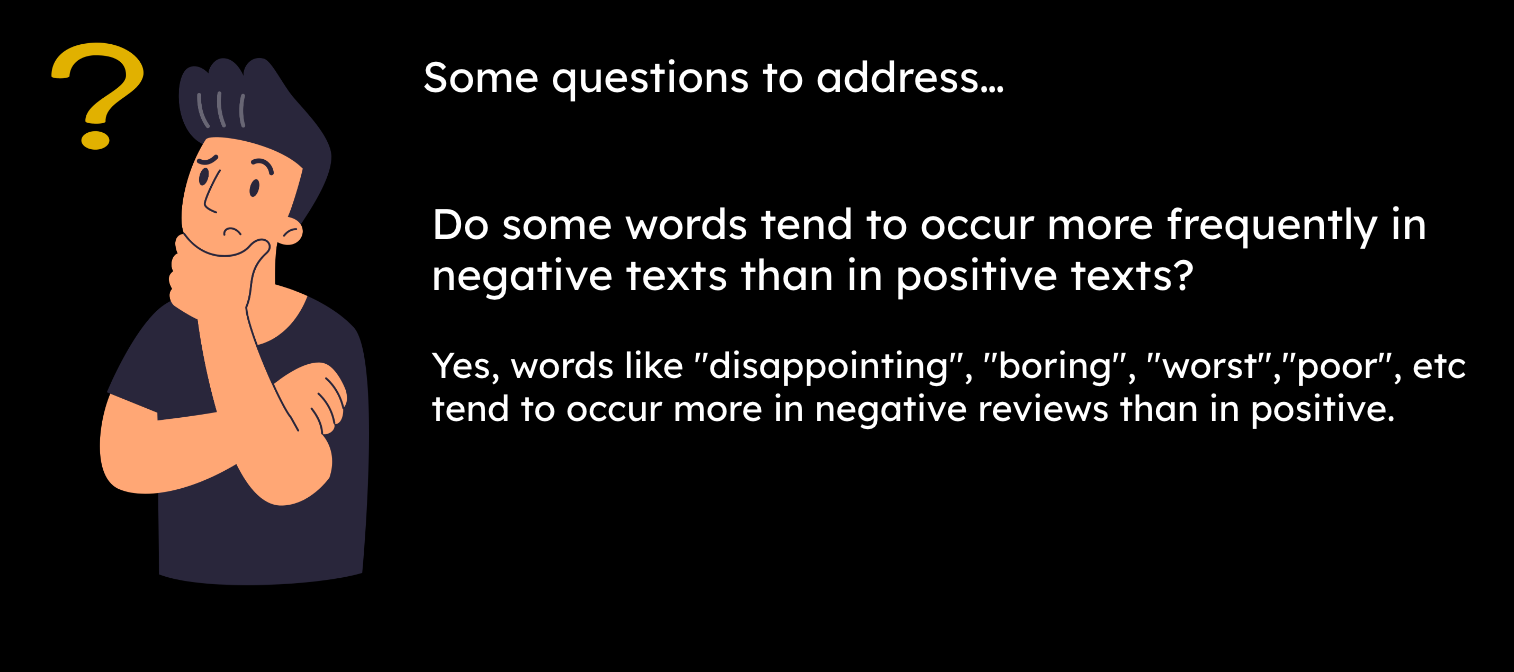

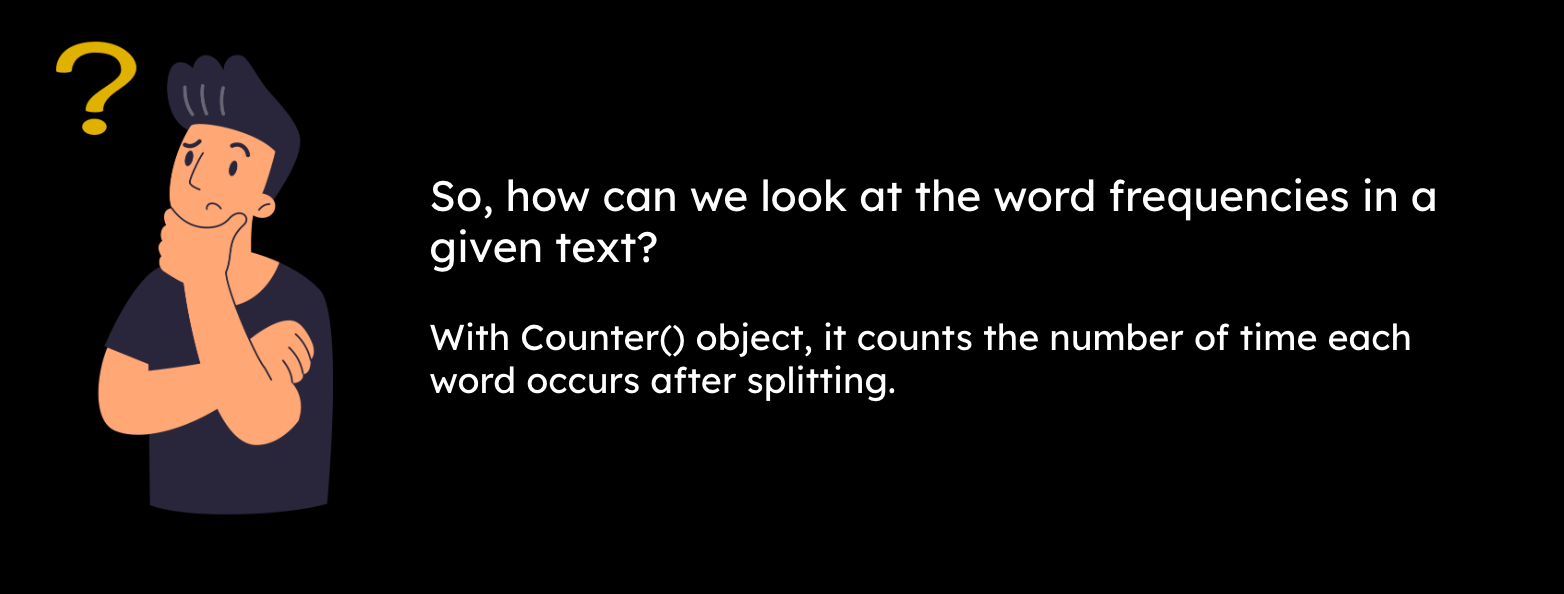

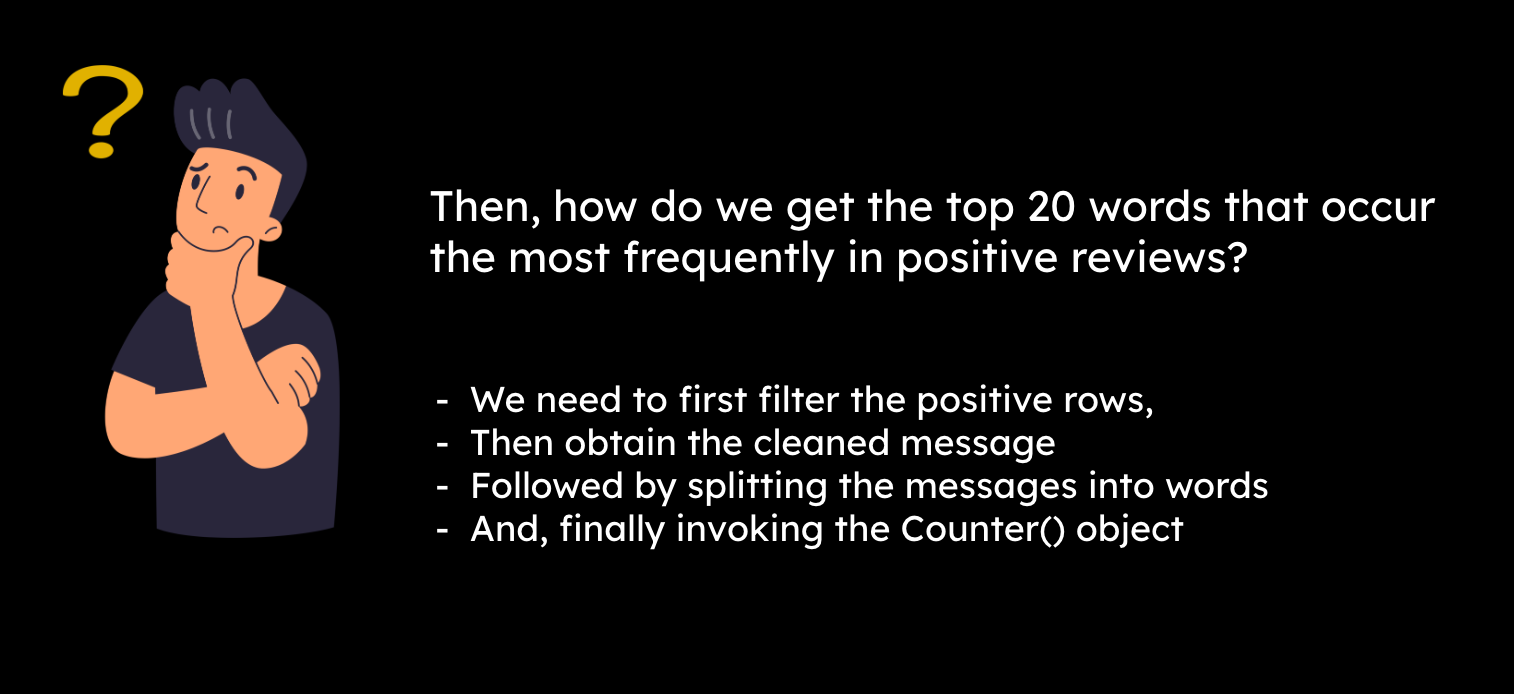

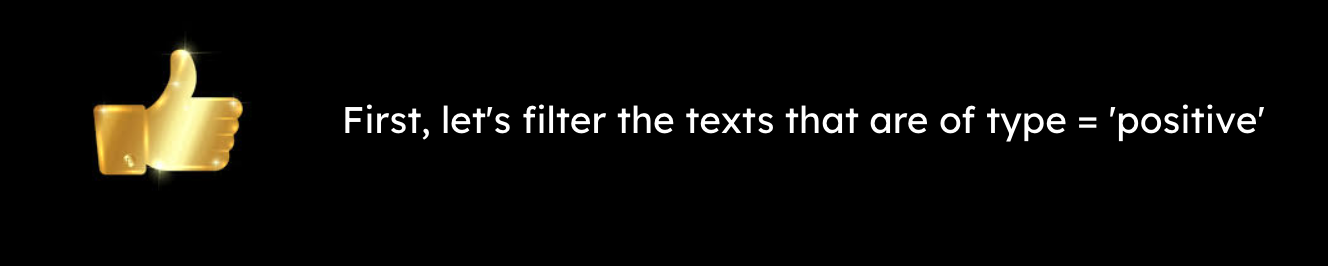

In [ ]:
positive = df[df['Sentiment'] == 'Positive']
positive

Review Sentiment  \
0                Outstanding in every aspect!  Positive   
1                Outstanding in every aspect!  Positive   
2     Amazing visuals and great storytelling.  Positive   
3                 Brilliant acting and story.  Positive   
4                      Great movie, loved it!  Positive   
...                                       ...       ...   
5995   Incredible performance, very touching.  Positive   
5996          A masterpiece, truly inspiring!  Positive   
5997   Incredible performance, very touching.  Positive   
5998      Wonderful experience, a must-watch!  Positive   
5999      Wonderful experience, a must-watch!  Positive   

                         cleaned_message  
0               outstanding every aspect  
1               outstanding every aspect  
2     amazing visuals great storytelling  
3                 brilliant acting story  
4                      great movie loved  
...                                  ...  
5995     incredible performance touching  
5996         masterpiece truly inspiring  
5997     incredible performance touching  
5998      wonderful experience mustwatch  
5999      wonderful experience mustwatch  

[5000 rows x 3 columns]

Since we only wish to look at our preprocessed text, we get the cleaned_message column

In [ ]:
positive = positive['cleaned_message']
positive

0                 outstanding every aspect
1                 outstanding every aspect
2       amazing visuals great storytelling
3                   brilliant acting story
4                        great movie loved
                       ...                
5995       incredible performance touching
5996           masterpiece truly inspiring
5997       incredible performance touching
5998        wonderful experience mustwatch
5999        wonderful experience mustwatch
Name: cleaned_message, Length: 5000, dtype: object

We club all the texts for Positive

In [ ]:
positive = " ".join(positive)
positive

'outstanding every aspect outstanding every aspect amazing visuals great storytelling brilliant acting story great movie loved fantastic thoroughly enjoyed every part fantastic thoroughly enjoyed every part wonderful experience mustwatch amazing visuals great storytelling outstanding every aspect great movie loved wonderful experience mustwatch heartwarming memorable brilliant acting story heartwarming memorable wonderful experience mustwatch amazing visuals great storytelling heartwarming memorable brilliant acting story amazing visuals great storytelling excellent film highly recommend incredible performance touching masterpiece truly inspiring outstanding every aspect incredible performance touching great movie loved outstanding every aspect great movie loved fantastic thoroughly enjoyed every part excellent film highly recommend great movie loved great movie loved fantastic thoroughly enjoyed every part excellent film highly recommend outstanding every aspect fantastic thoroughly e

Now Splitting the entire text into words

In [ ]:
positive = positive.split()
positive

['outstanding',
 'every',
 'aspect',
 'outstanding',
 'every',
 'aspect',
 'amazing',
 'visuals',
 'great',
 'storytelling',
 'brilliant',
 'acting',
 'story',
 'great',
 'movie',
 'loved',
 'fantastic',
 'thoroughly',
 'enjoyed',
 'every',
 'part',
 'fantastic',
 'thoroughly',
 'enjoyed',
 'every',
 'part',
 'wonderful',
 'experience',
 'mustwatch',
 'amazing',
 'visuals',
 'great',
 'storytelling',
 'outstanding',
 'every',
 'aspect',
 'great',
 'movie',
 'loved',
 'wonderful',
 'experience',
 'mustwatch',
 'heartwarming',
 'memorable',
 'brilliant',
 'acting',
 'story',
 'heartwarming',
 'memorable',
 'wonderful',
 'experience',
 'mustwatch',
 'amazing',
 'visuals',
 'great',
 'storytelling',
 'heartwarming',
 'memorable',
 'brilliant',
 'acting',
 'story',
 'amazing',
 'visuals',
 'great',
 'storytelling',
 'excellent',
 'film',
 'highly',
 'recommend',
 'incredible',
 'performance',
 'touching',
 'masterpiece',
 'truly',
 'inspiring',
 'outstanding',
 'every',
 'aspect',
 'incredi

Finding the top 20 words mostly used in Positive

In [ ]:
counter_positive = Counter(positive).most_common(20)
counter_positive

[('great', 1008),
 ('every', 988),
 ('brilliant', 517),
 ('acting', 517),
 ('story', 517),
 ('masterpiece', 510),
 ('truly', 510),
 ('inspiring', 510),
 ('movie', 506),
 ('loved', 506),
 ('incredible', 506),
 ('performance', 506),
 ('touching', 506),
 ('amazing', 502),
 ('visuals', 502),
 ('storytelling', 502),
 ('excellent', 502),
 ('film', 502),
 ('highly', 502),
 ('recommend', 502)]

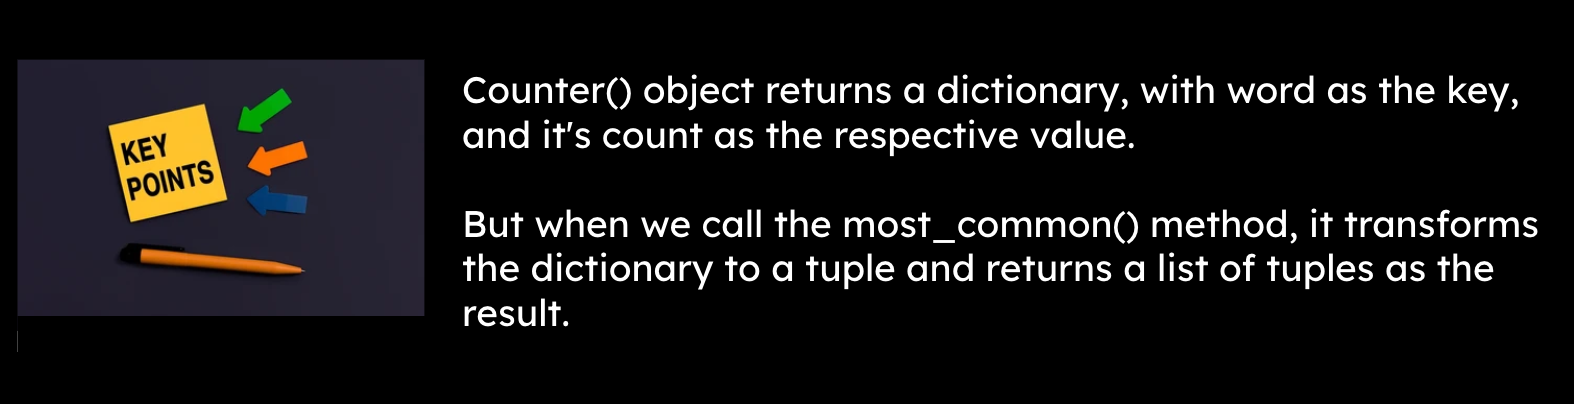

We can see that there is a difference of words contained in positive and negative reviews.

Negative reviews have words like, "boring", "diappointing", "poor", "waste", "worst", etc.


Converting the categorical feature `Sentiment` into a numerical feature by mapping positive value as 0, and negative values as 1.

In [ ]:
df["Sentiment"] = df["Sentiment"].map({'Positive':0,'Negative':1})

Performing the `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['Sentiment'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4500,), (1500,)]


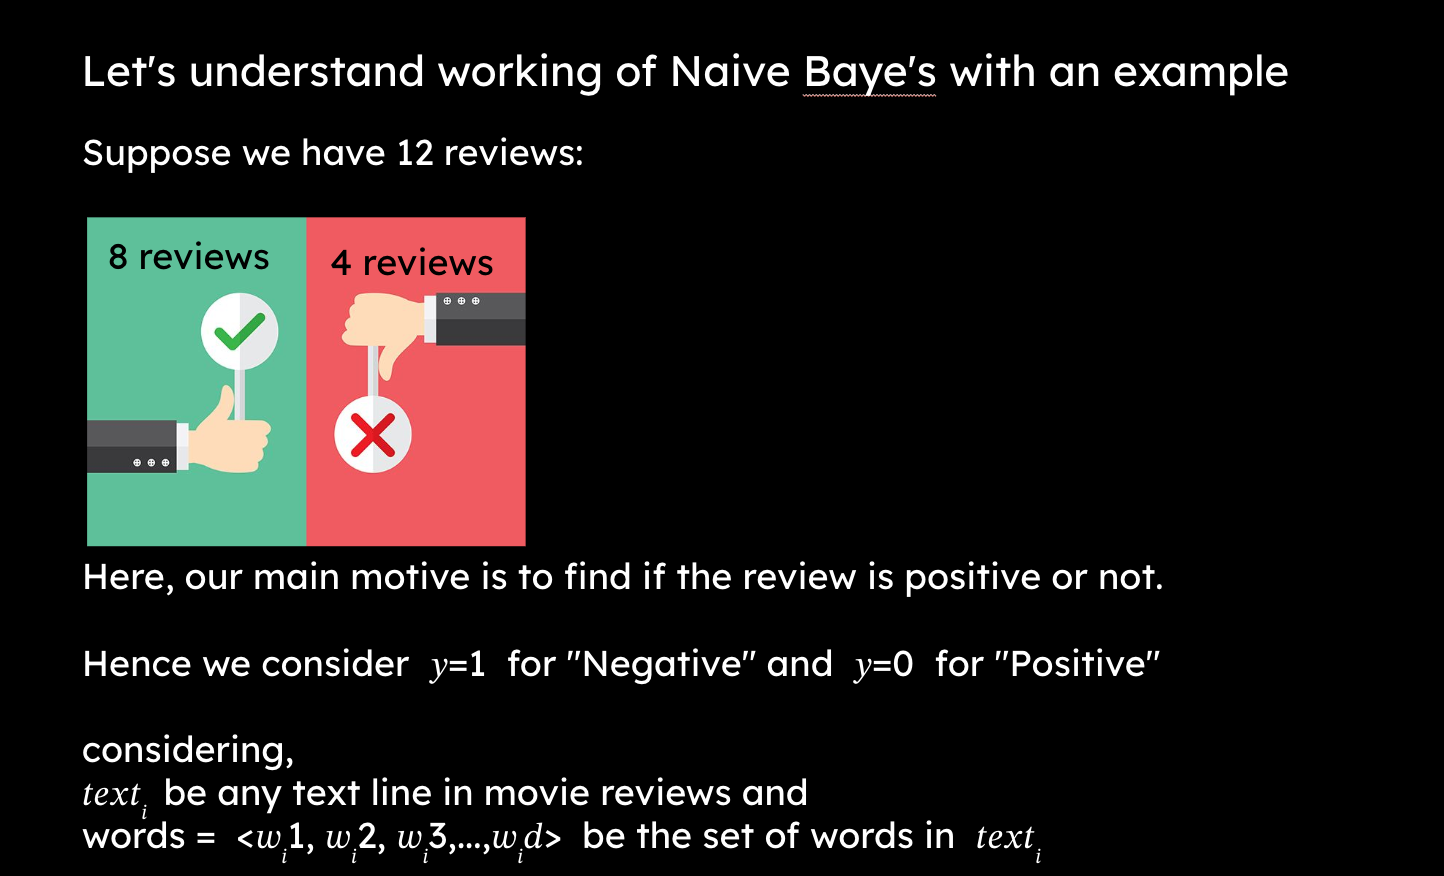

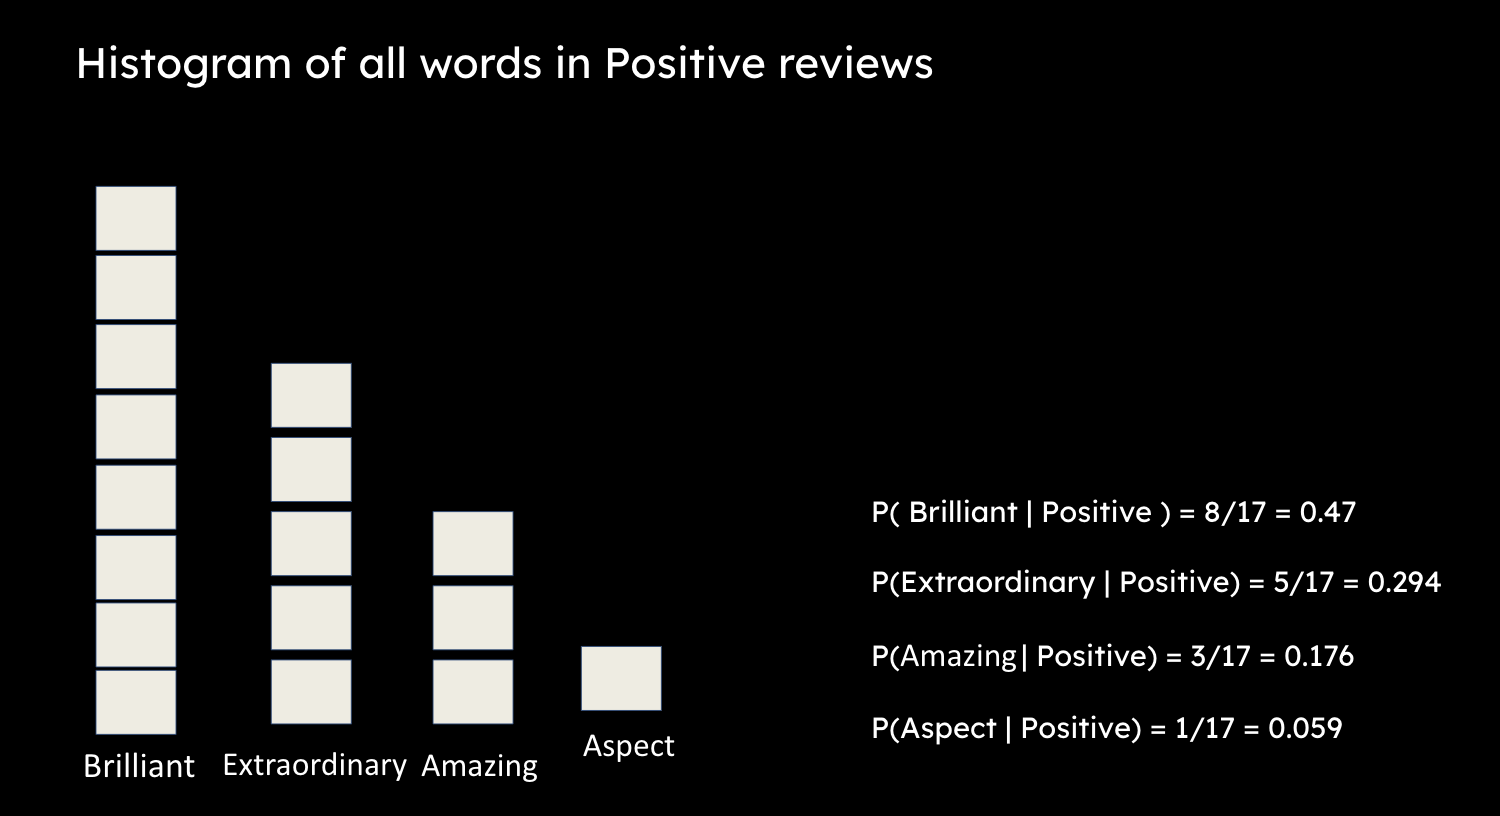

Similarly, we will create Histogram of all <b>Negative</b> reviews

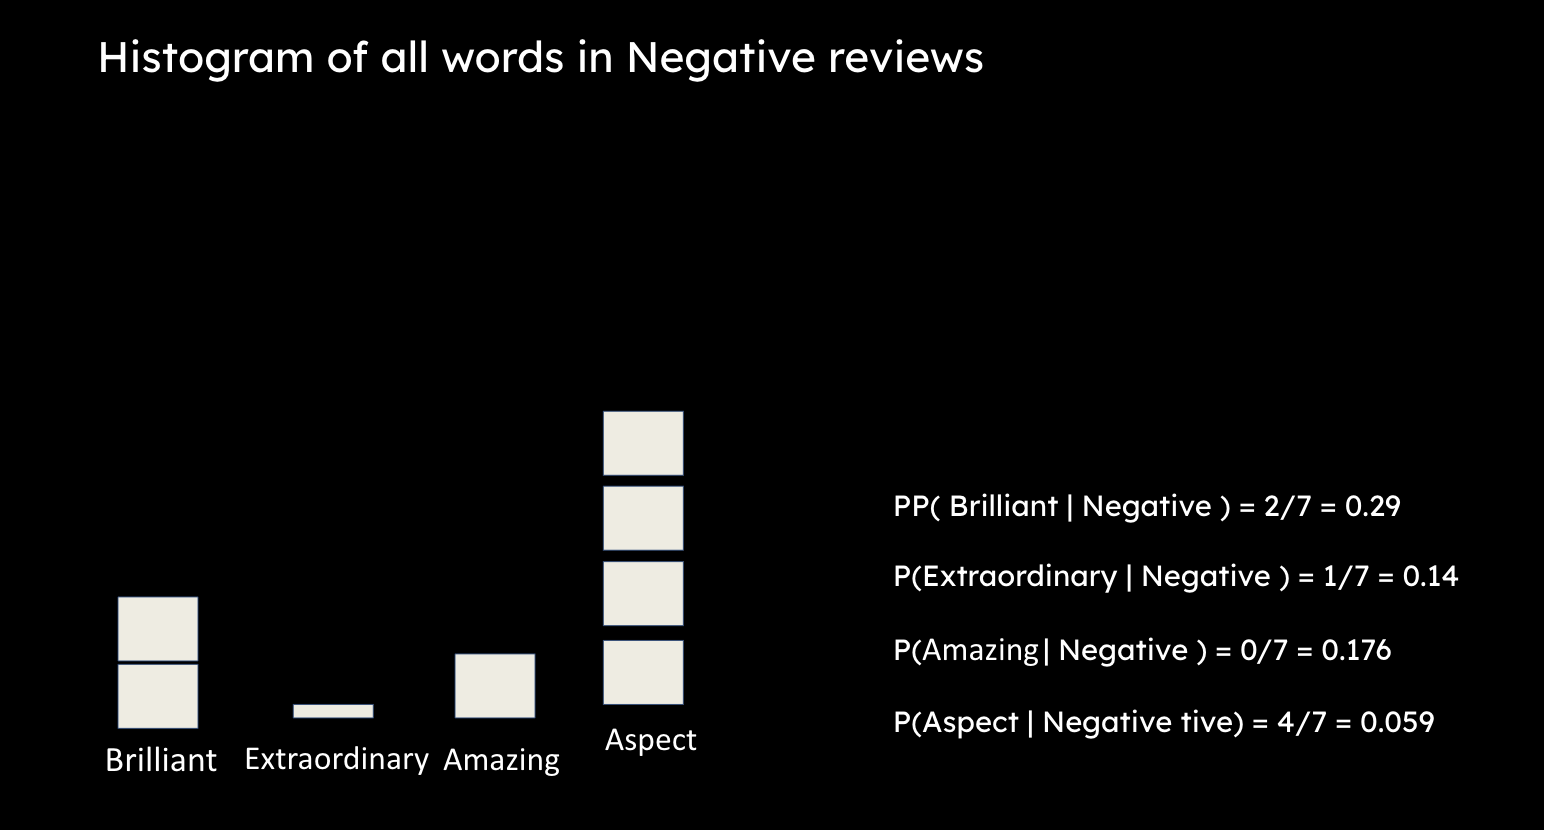

Interesting thing to note here :
- Frequency of word <b> Extraordinary </b> is 0 here



- Now if you notice that we have calculated probabilites of individual ( or discrete ) words,
- not of something continous like price, weight, height
- so these probabilities are also called as <b>Likelihoods</b>

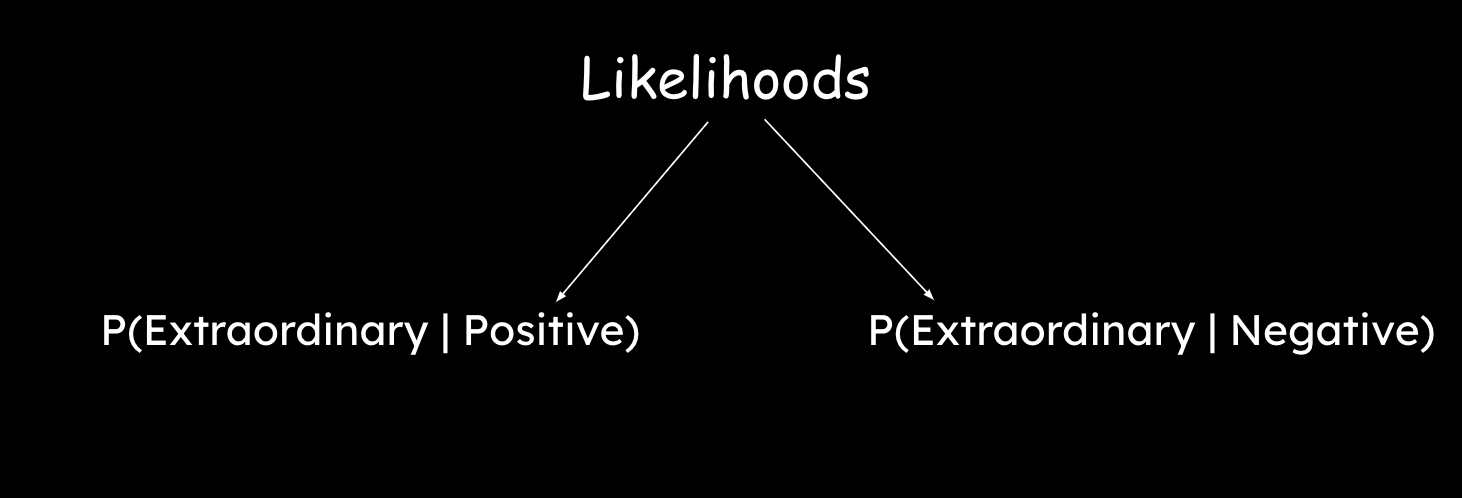

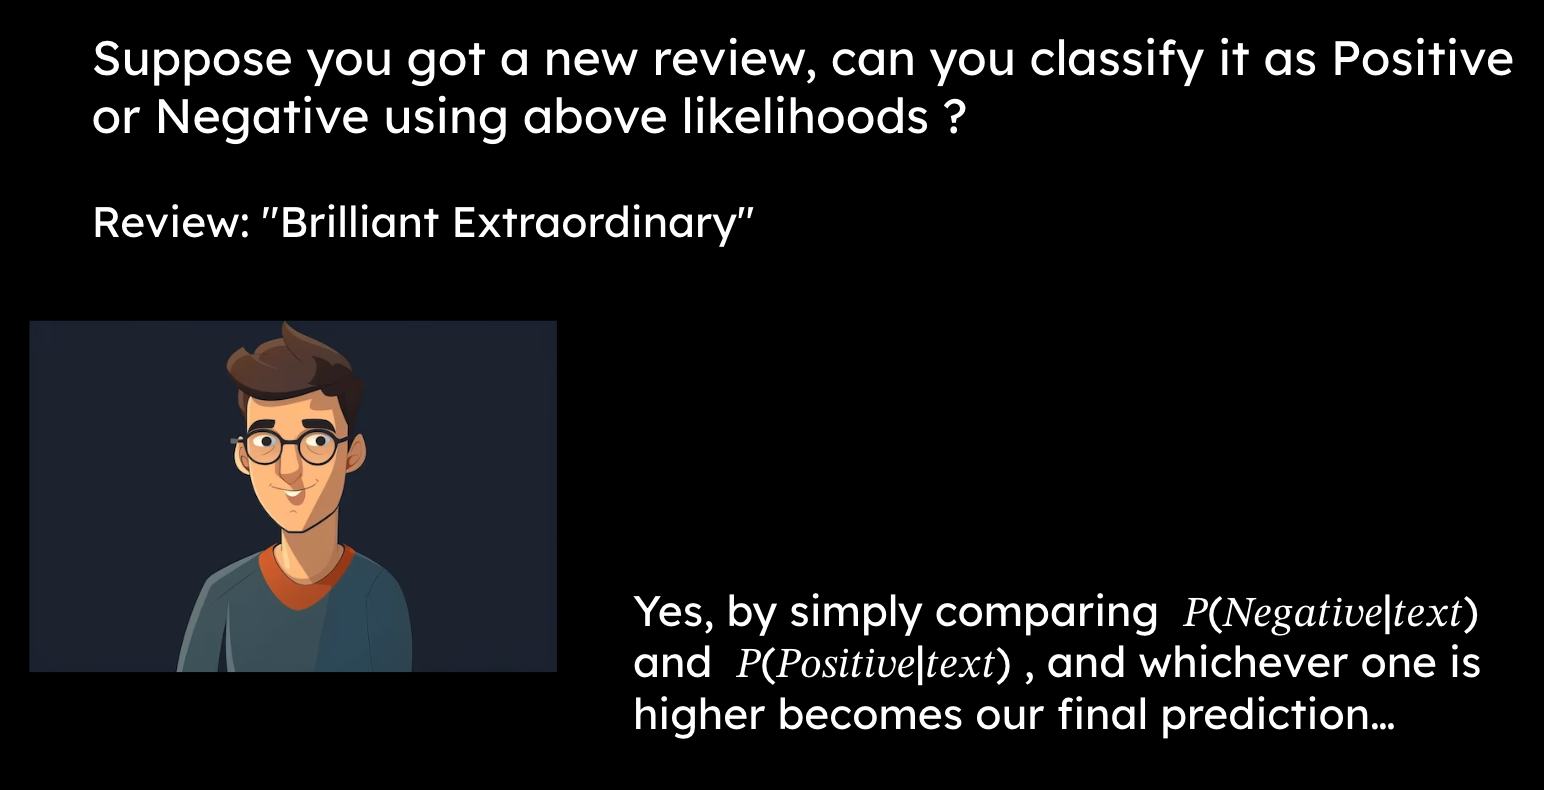

## Q. How can we make the final prediction of whether a new text is negative or not ?

By simply comparing $P(Negative|text)$ and $P(Positive|text)$, and which ever one is higher becomes our final prediction

Recall that we simply cancel out the constant $k = P(𝑤_𝑖^1,𝑤_𝑖^2,𝑤_𝑖^3,...,𝑤_𝑖^𝑑)$ from both the equations, since the constant is same in both $P(Negative|text)$ and $P(Positive|text)$

<br>

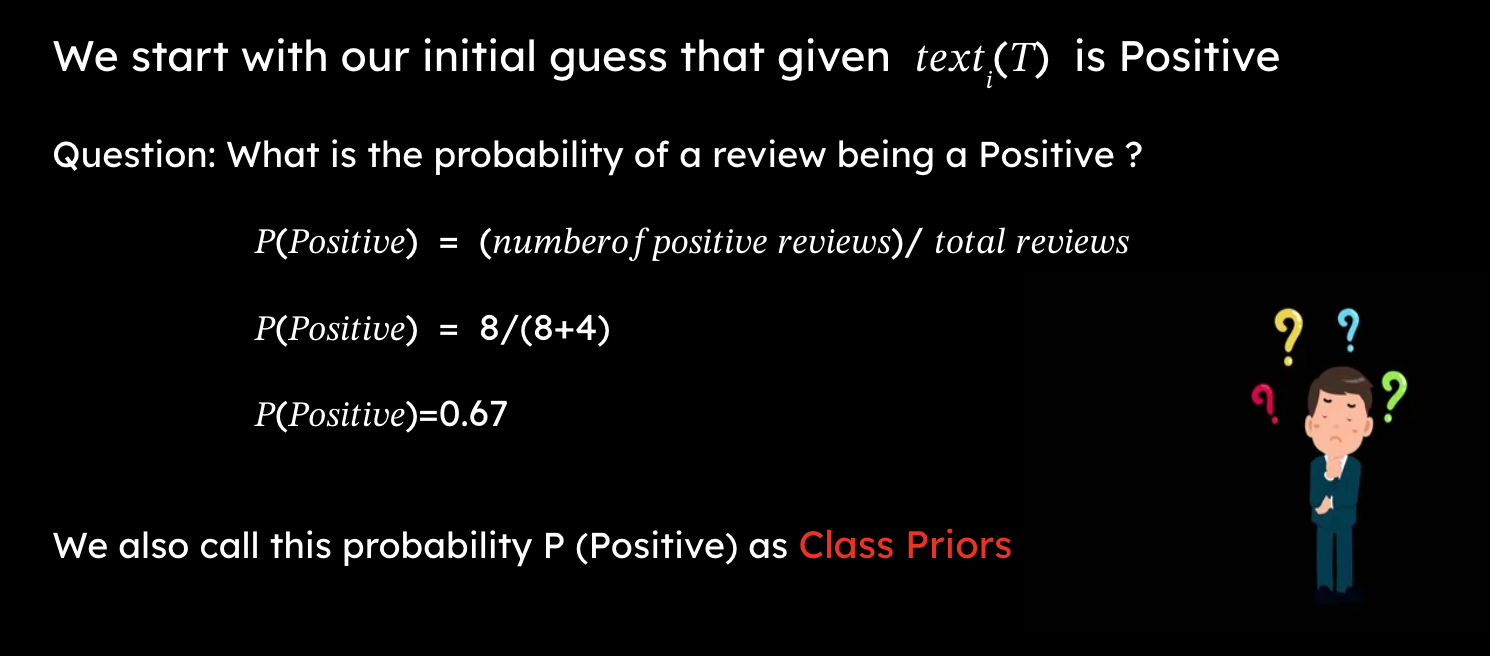

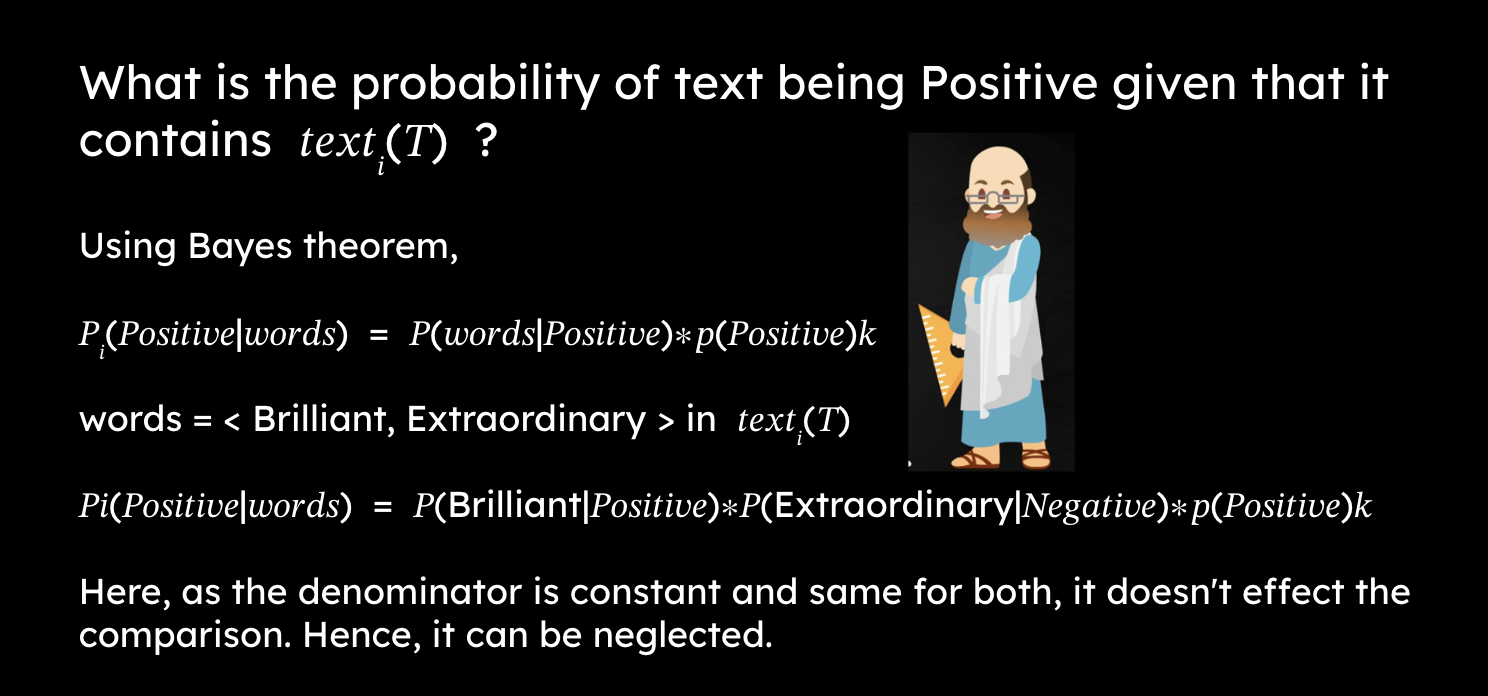

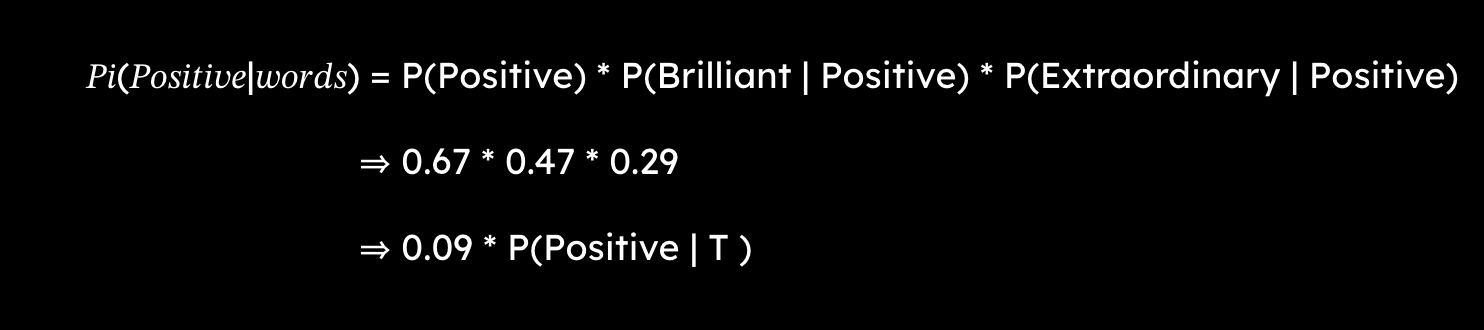

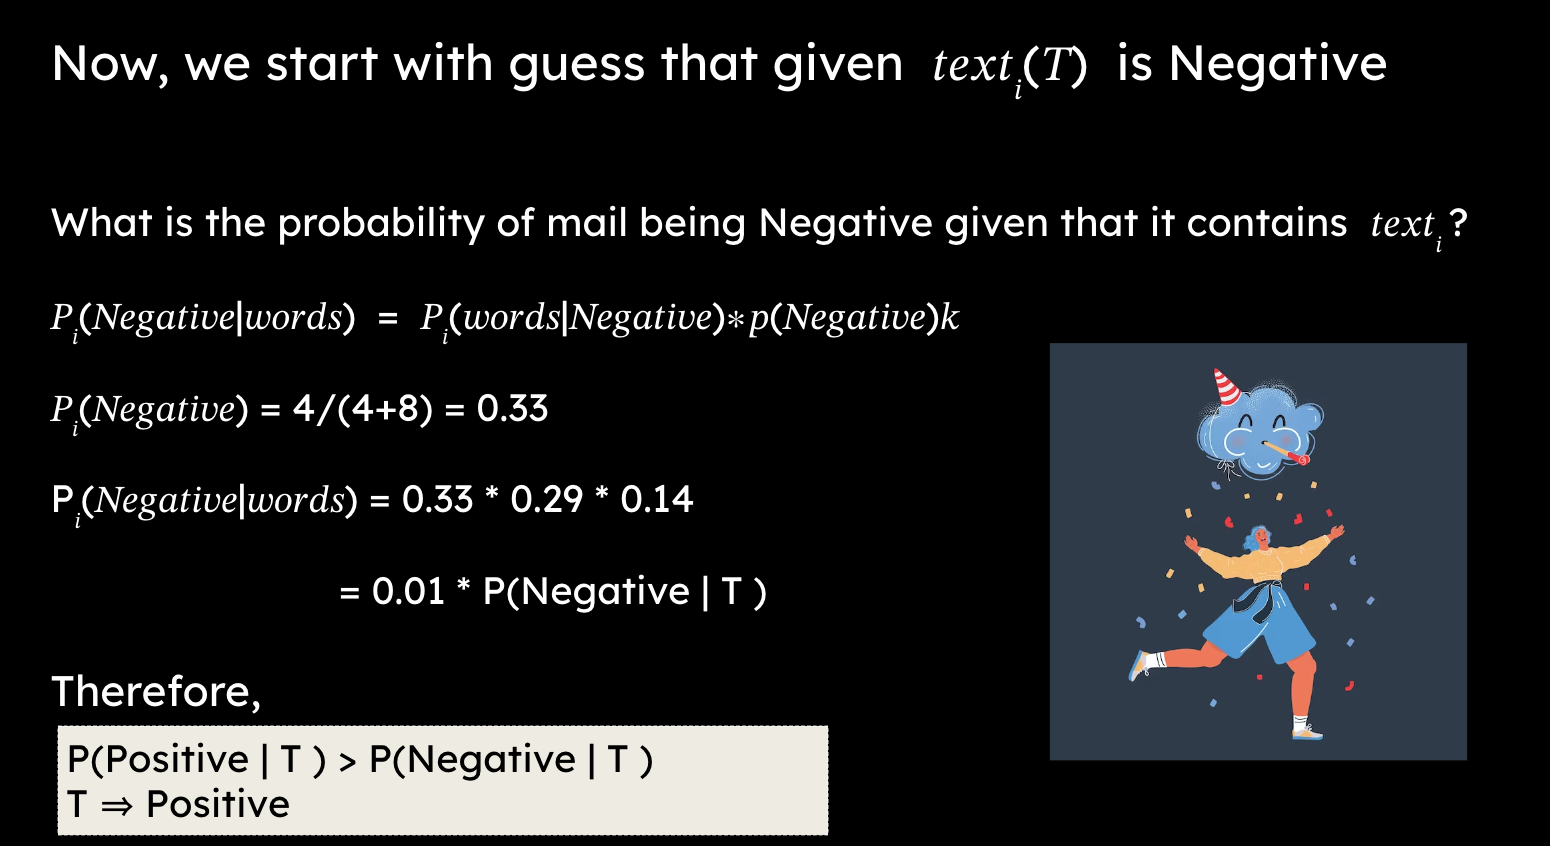

# Naive Assumption

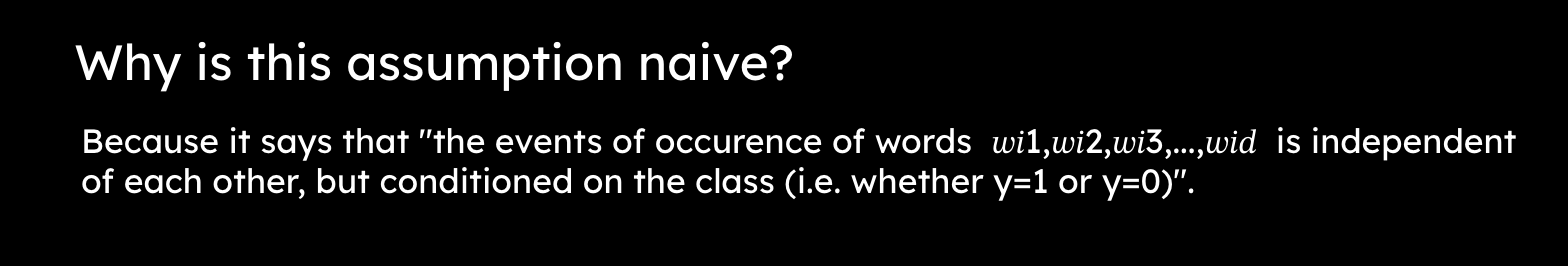

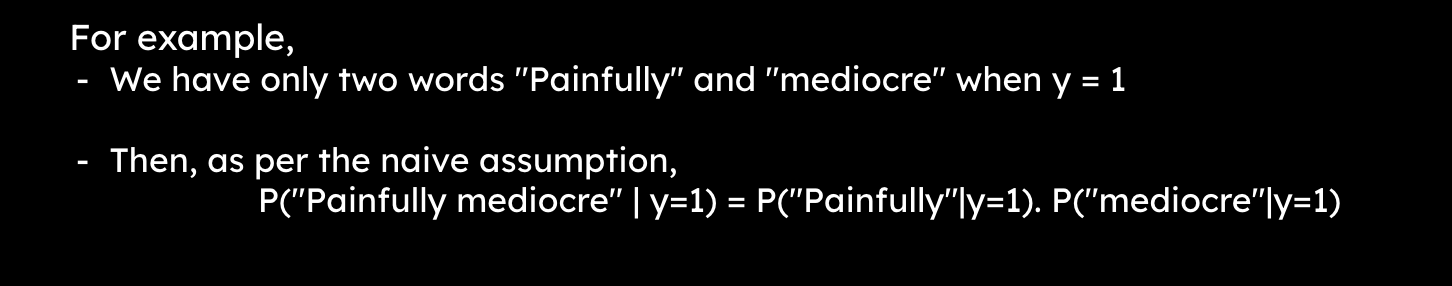

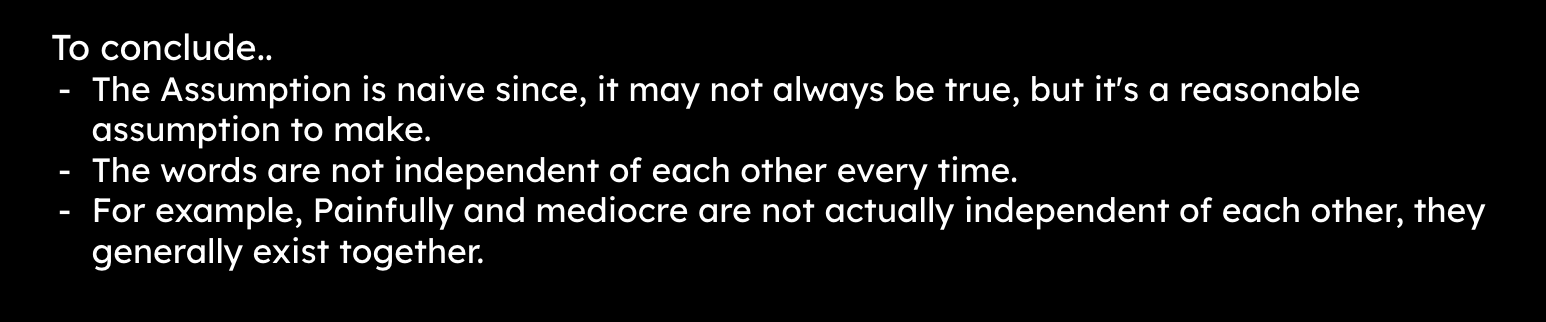

# Laplace Smoothing

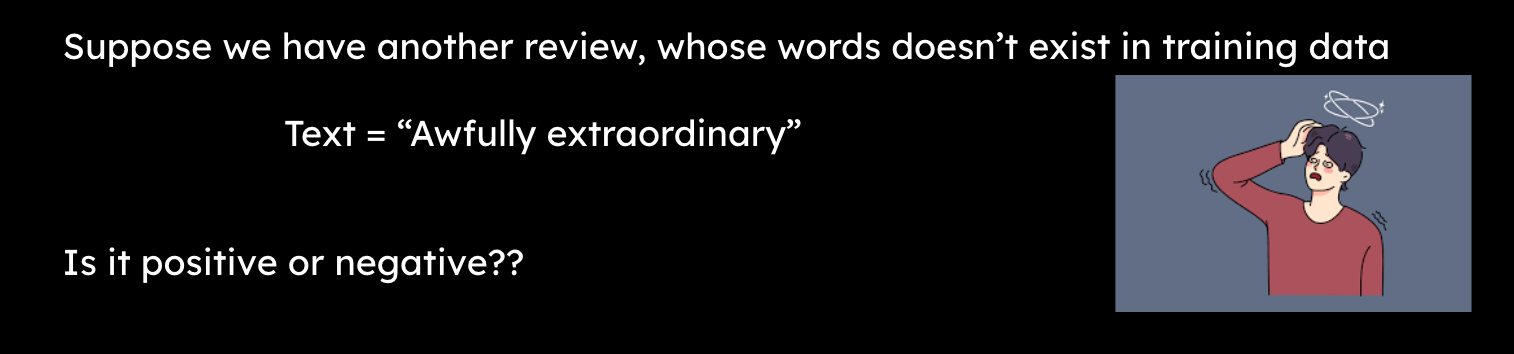

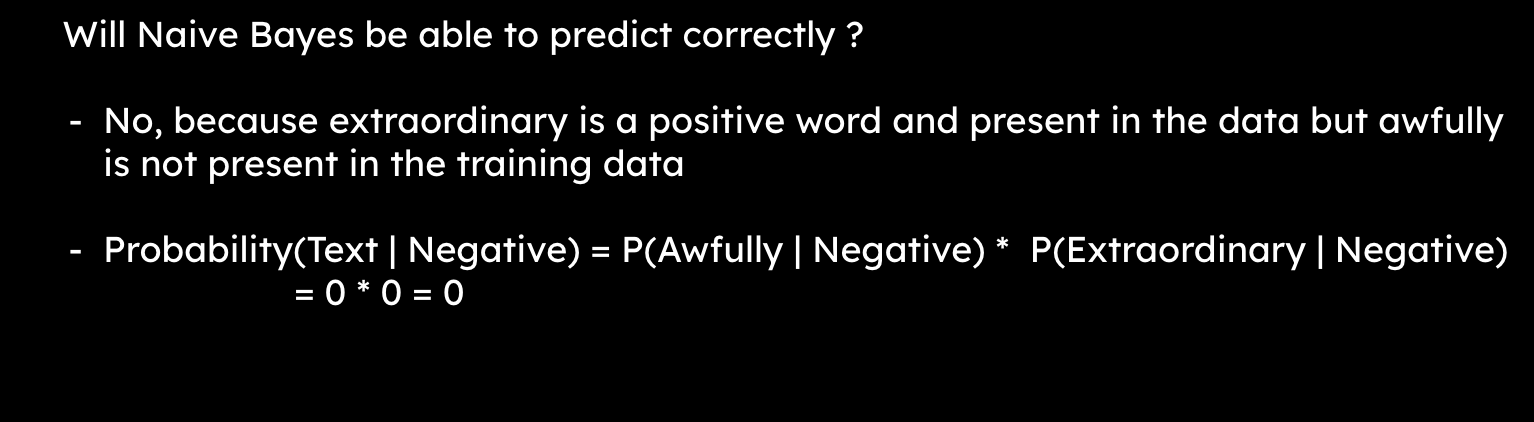

### How to handle such cases ?

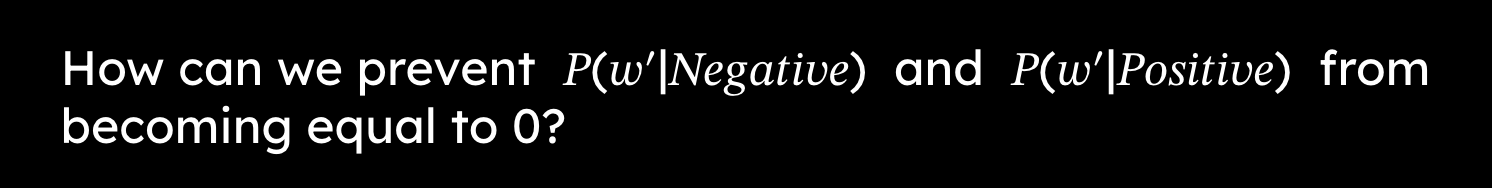

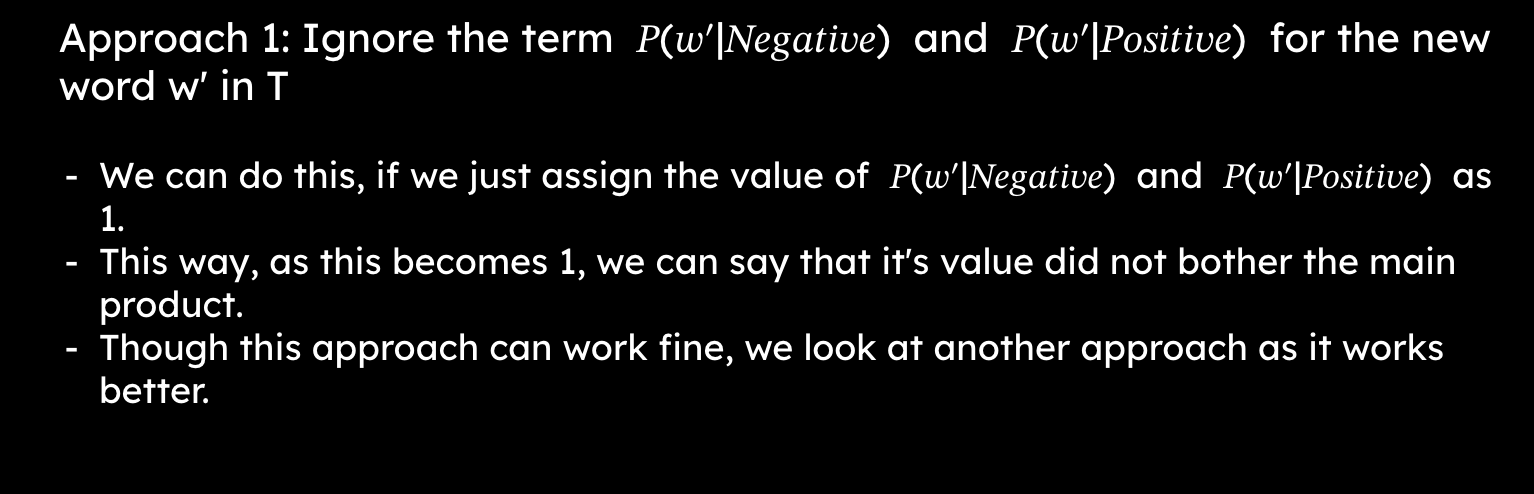

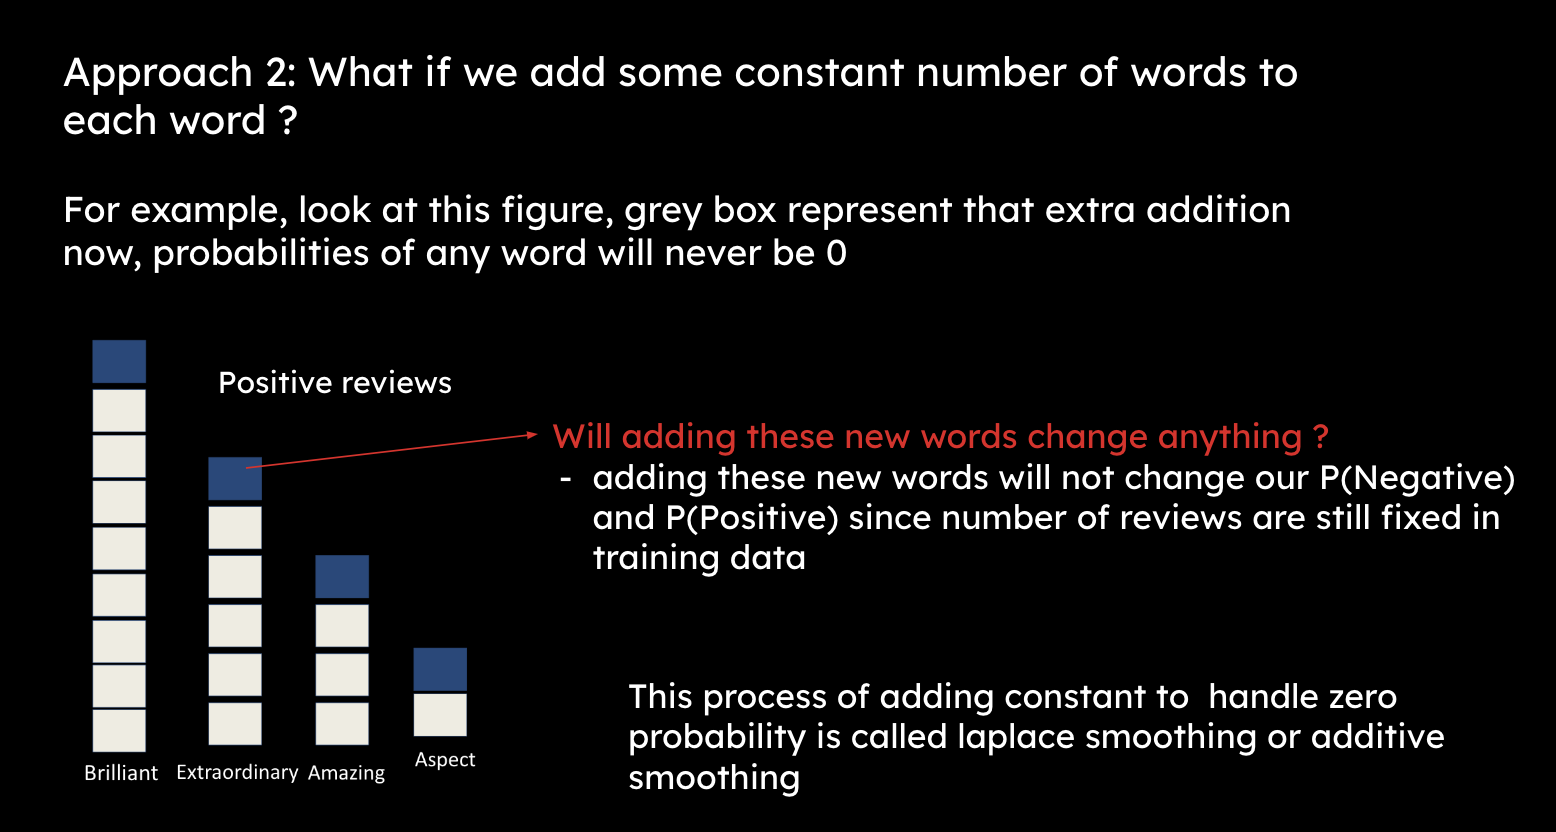

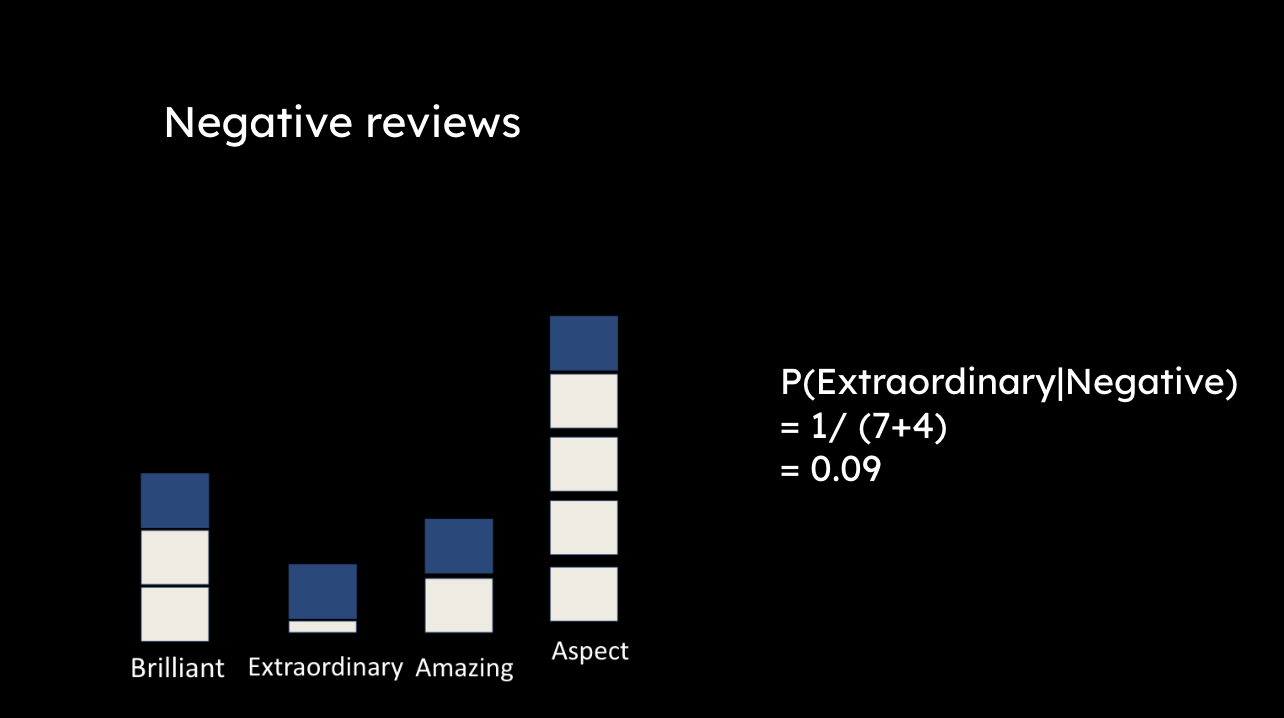

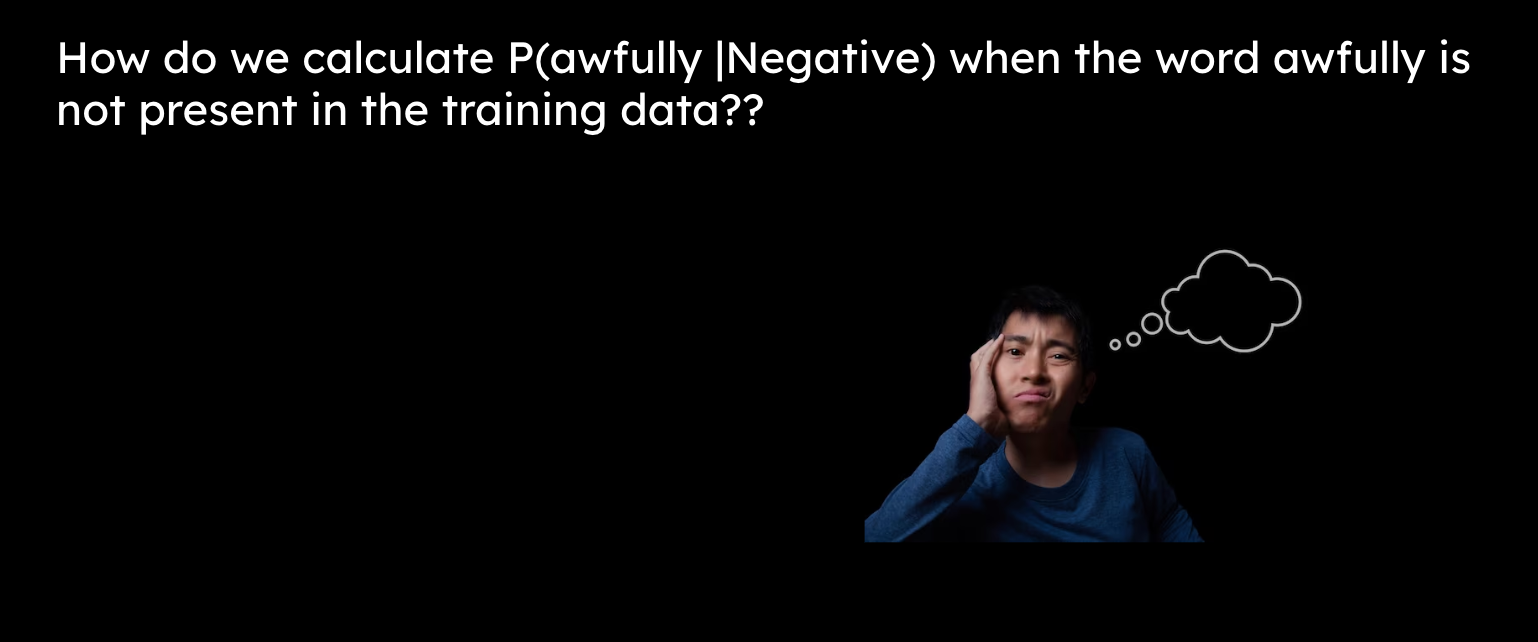

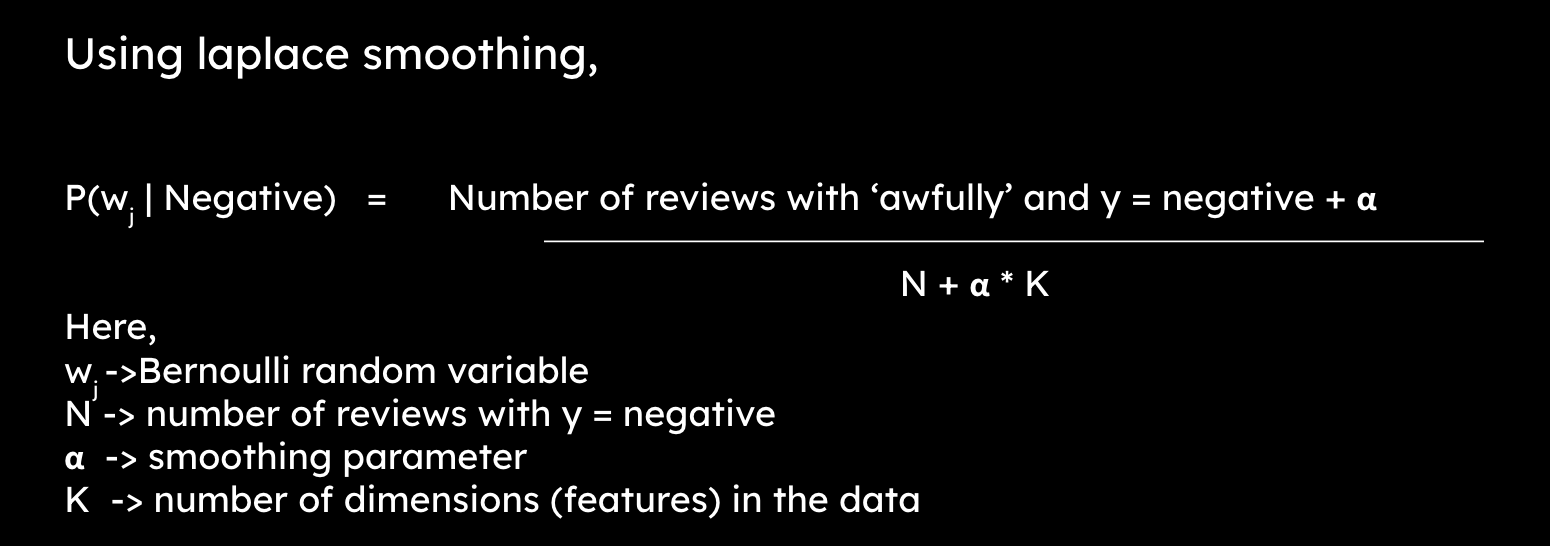

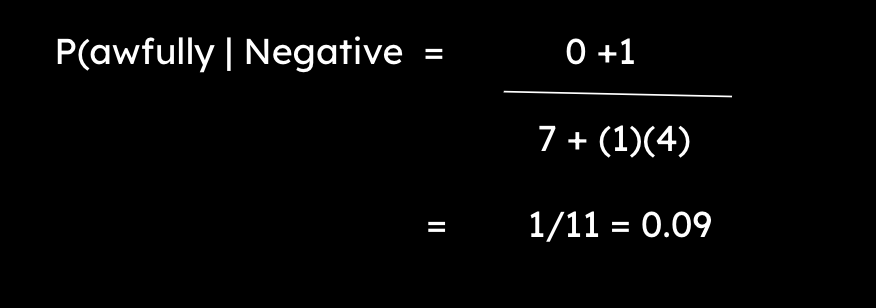

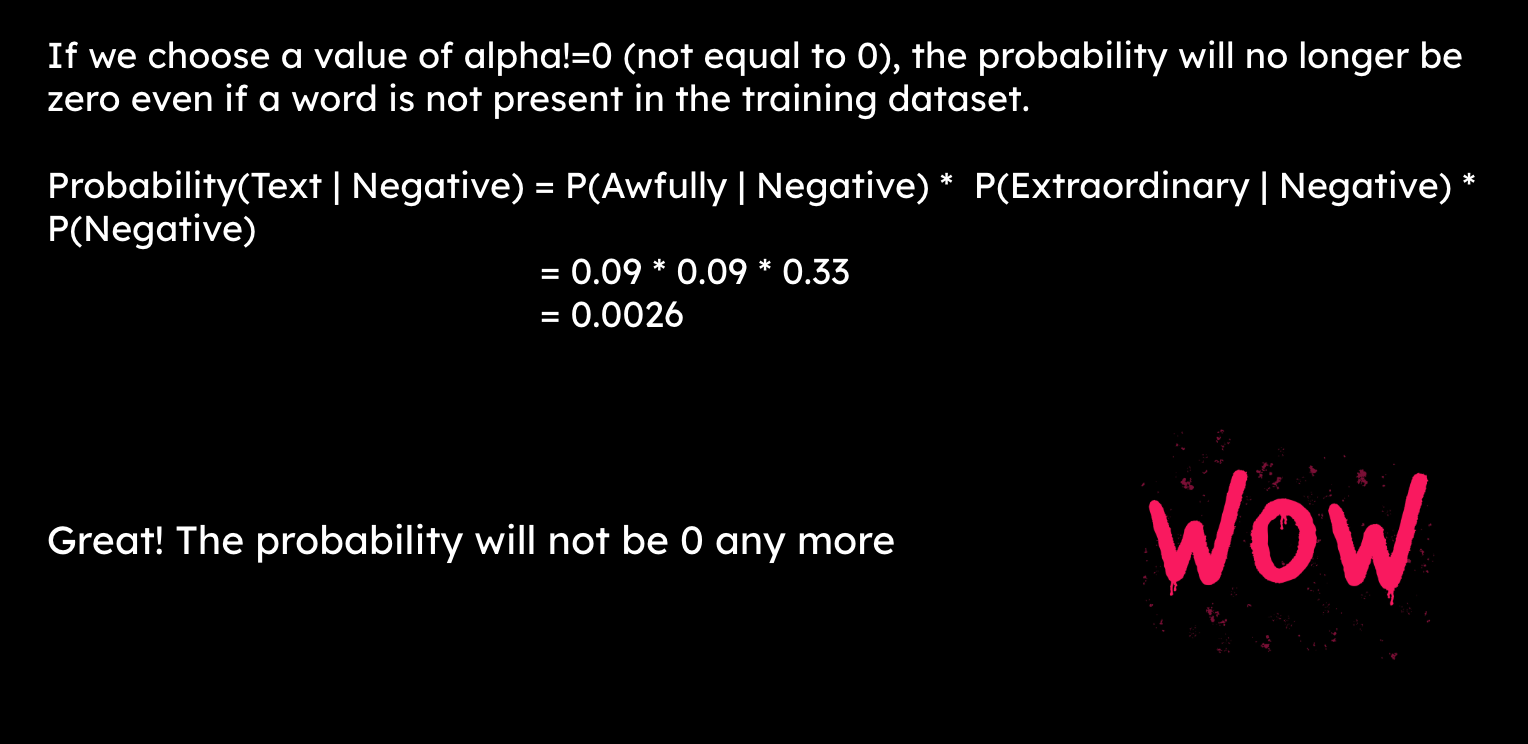

# Impact of outliers

Now lets talk about the outliers on Naive Bayes.

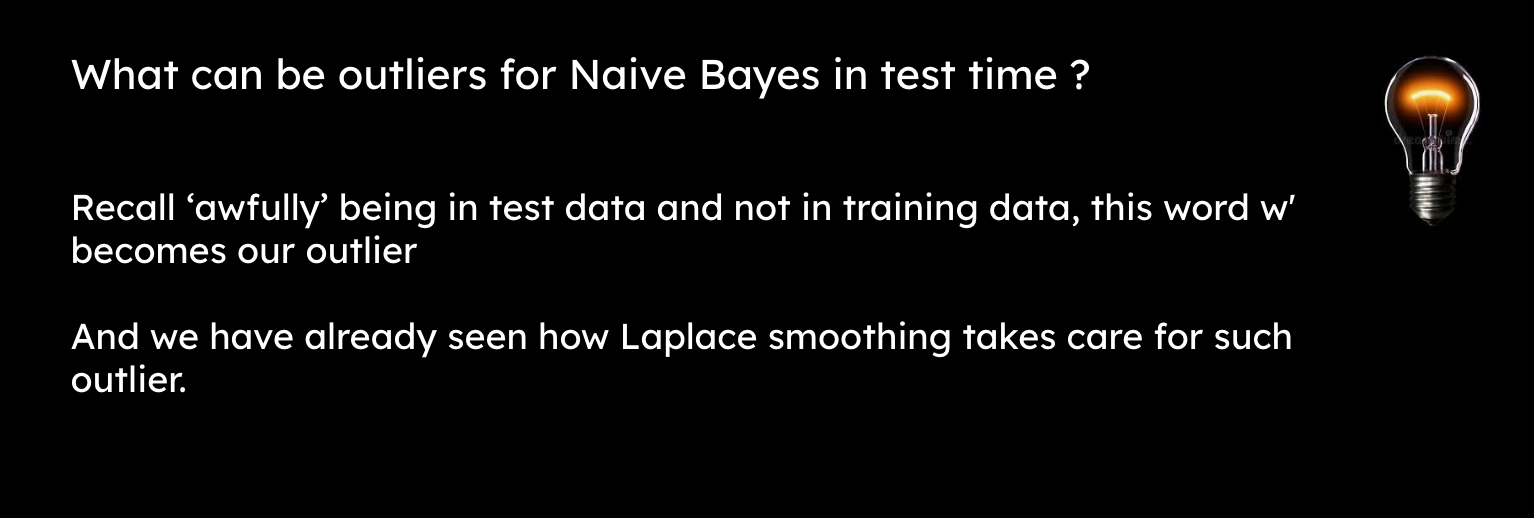

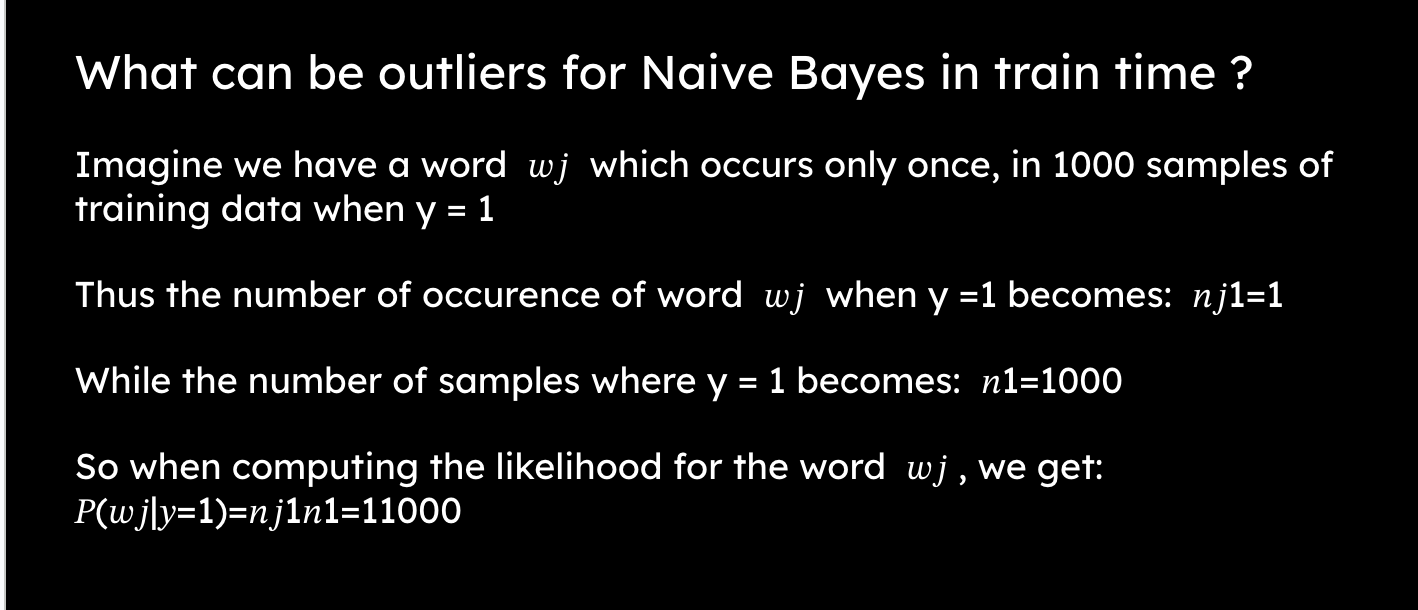

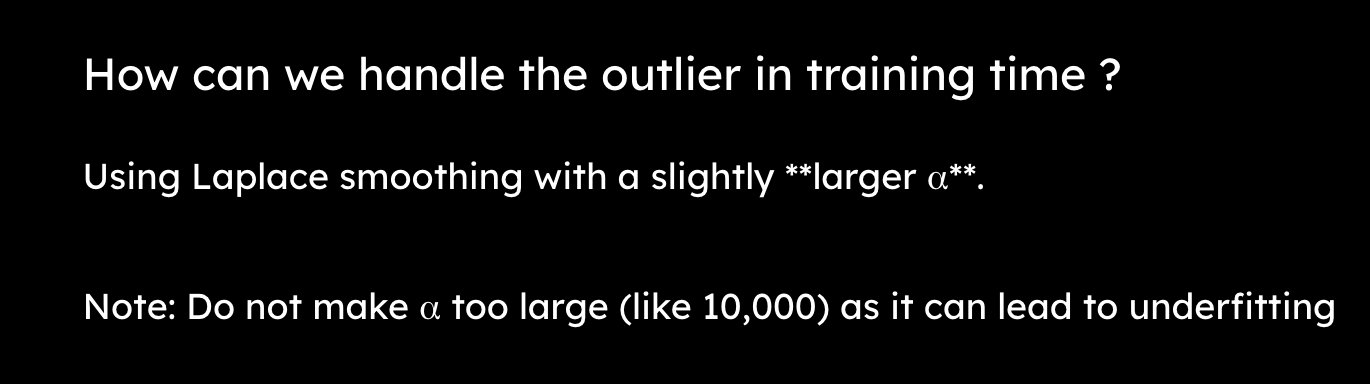

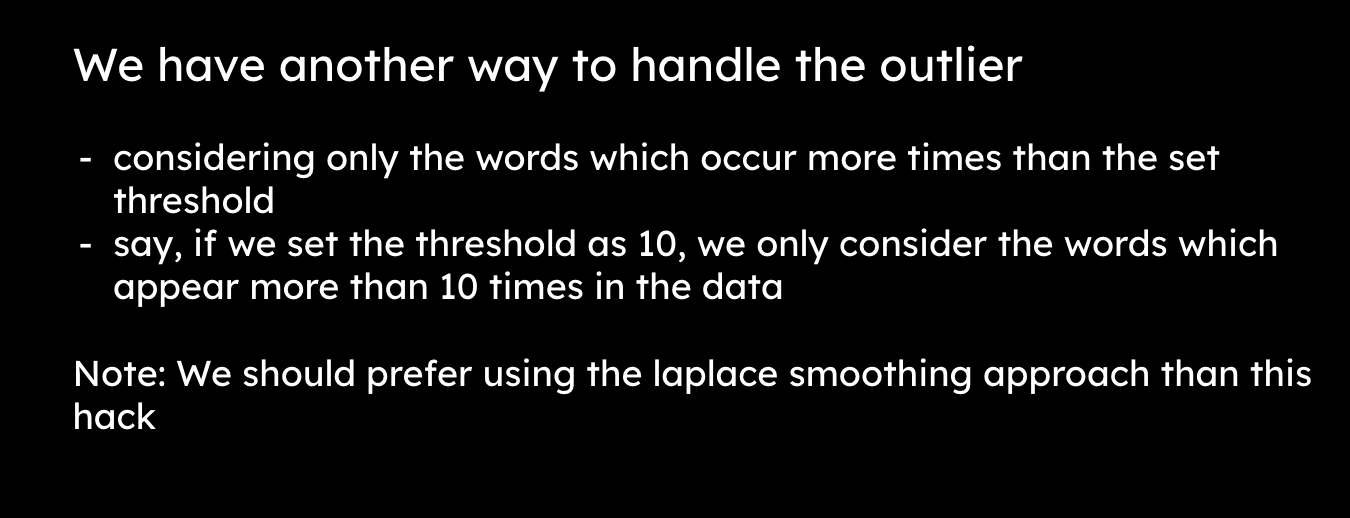

### Multinomial Naive Bayes

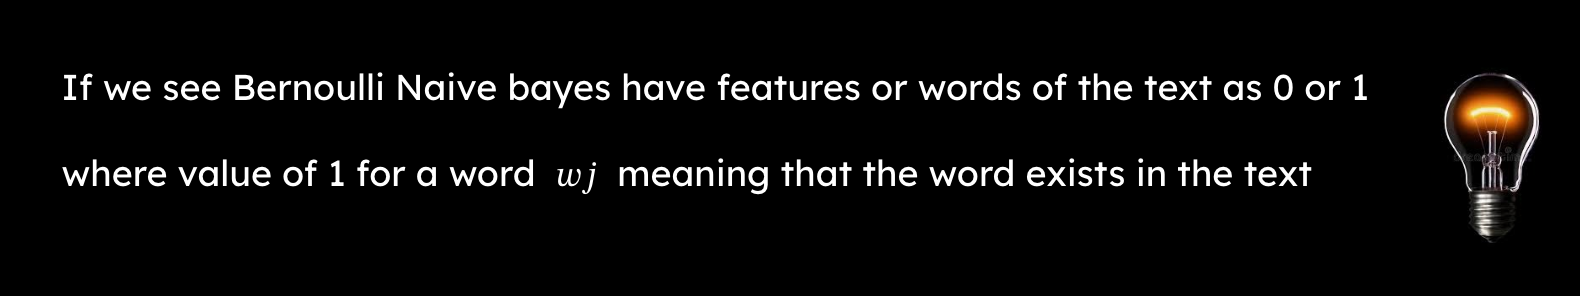

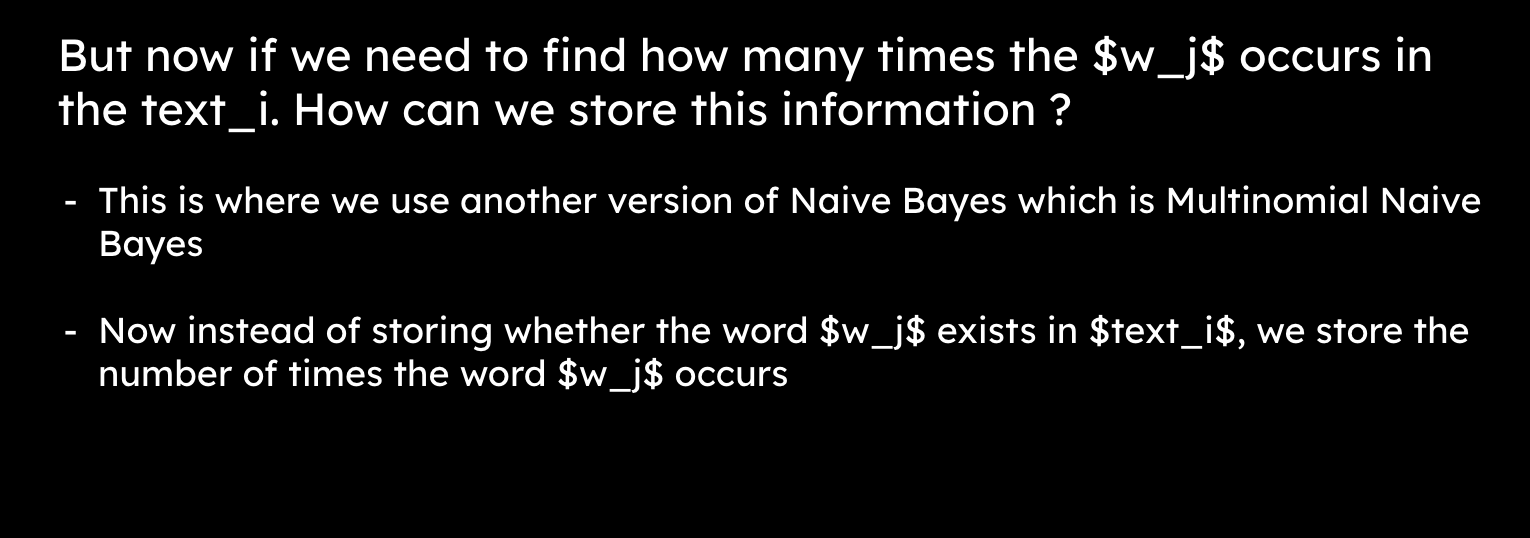

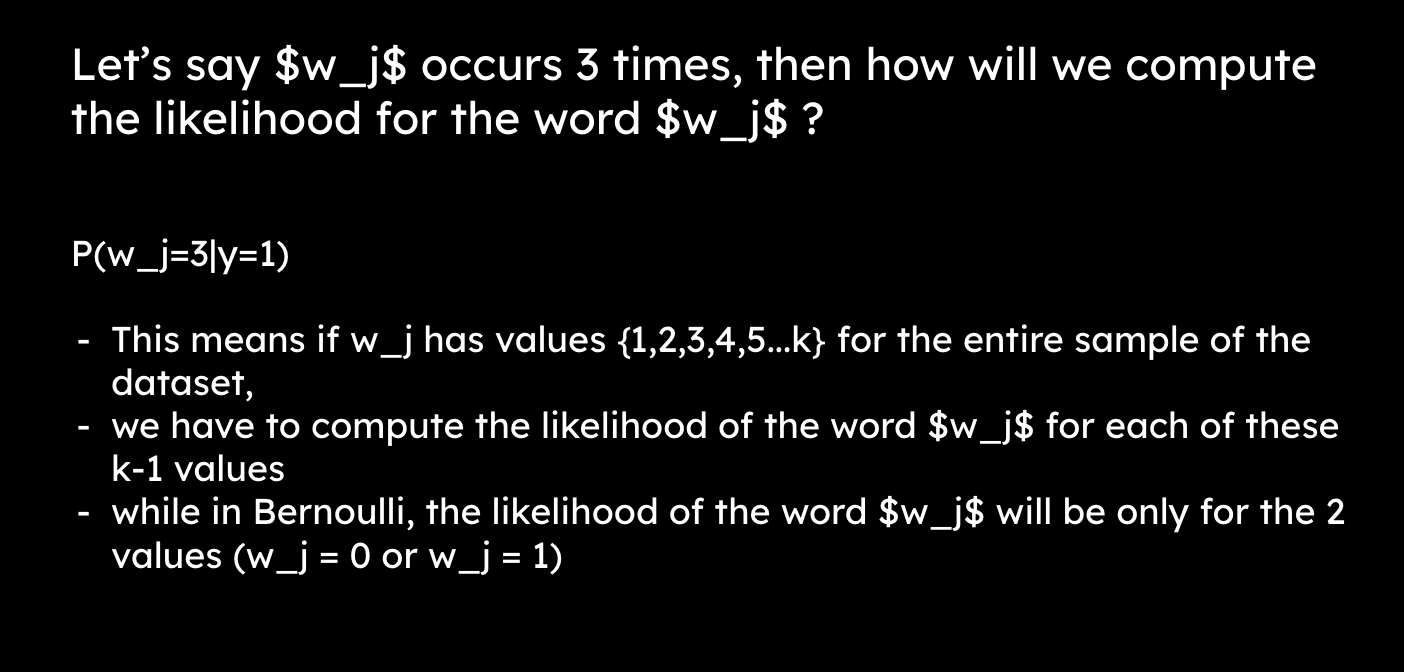

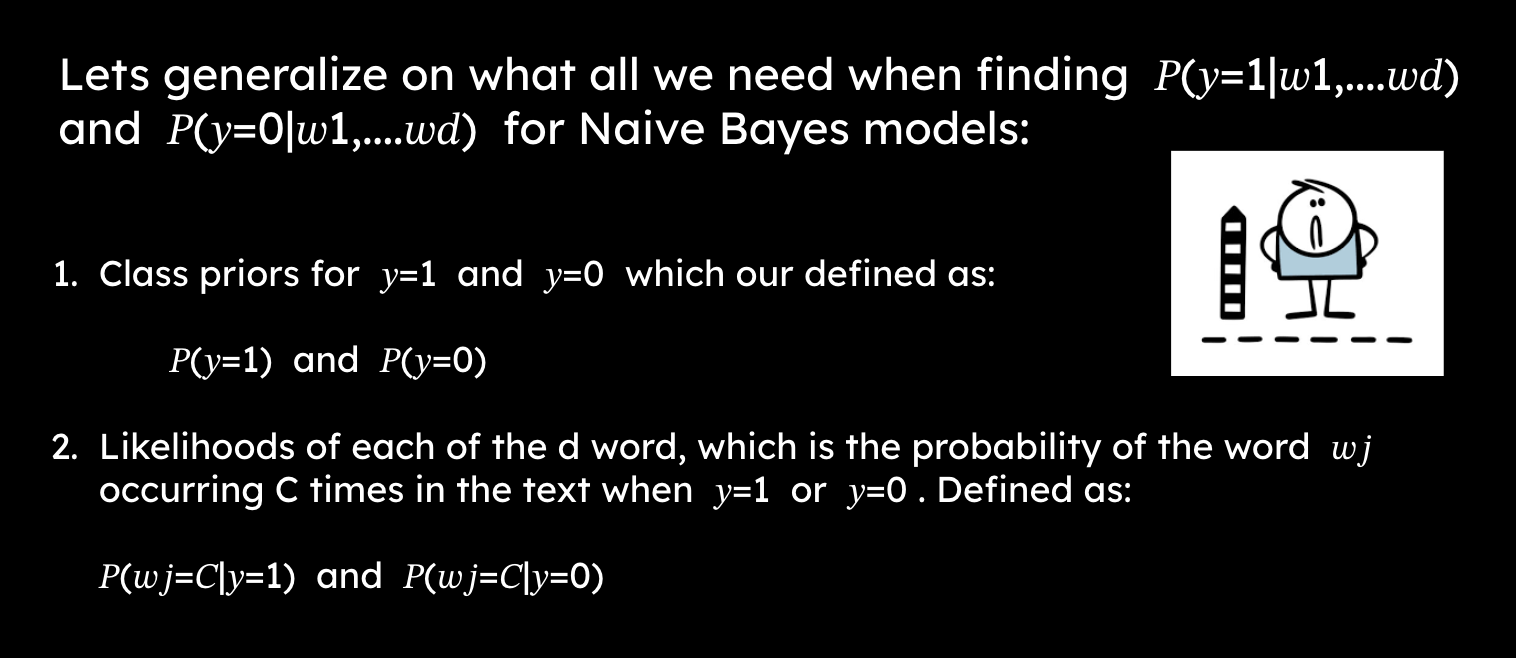

# Code

Lets implement Naive Bayes on our dataset

Now to find the count of each word in the text,  we use  [CountVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- that vectorizes the words with the counts of occurences of words in a given text i.

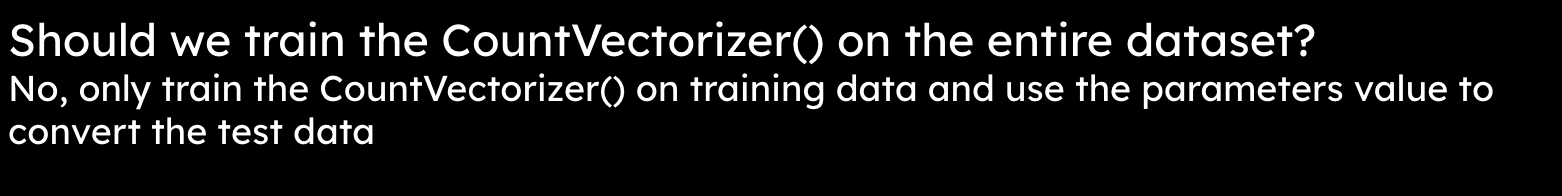

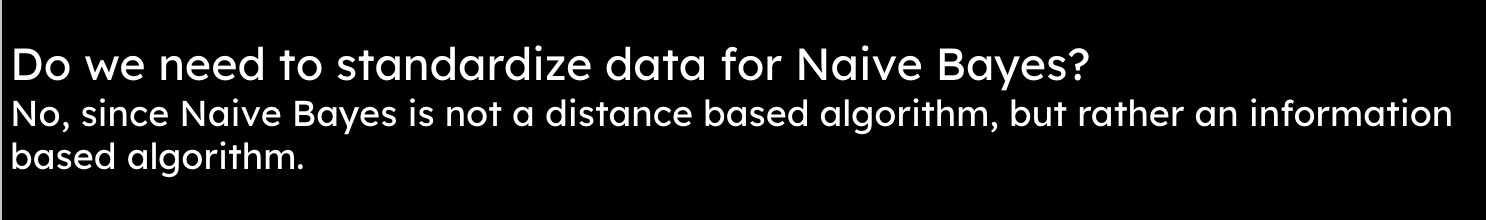

In [ ]:
from sklearn import feature_extraction, naive_bayes, metrics

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

print(X_train.shape,X_test.shape)


(4500, 58) (1500, 58)


Taking different values of Laplace Smoothing constant

In [ ]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

We plug in the following values into our `GridSearchCV()` function to get the results:-
- Multinomial NB classifier,
- dictionary containing the range of values we wish to try for our hyperparameter,
- scoring metric
- number of folds for the cross validation set


Since data is Imbalanced, we use F-1 score as evaluation metrics

In [ ]:
# Multinomial NB

from sklearn.model_selection import GridSearchCV

mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")



Parameters:{'alpha': 0.01} Mean_score: 1.0 Rank: 1
Parameters:{'alpha': 0.1} Mean_score: 1.0 Rank: 1
Parameters:{'alpha': 1} Mean_score: 1.0 Rank: 1
Parameters:{'alpha': 10} Mean_score: 1.0 Rank: 1


All values of alpha (0.01, 0.1, 1, 10) have resulted in a mean F1 score of 1.0, which is a perfect score.
This suggests that for each value of alpha, the model is perfectly classifying the training data.

Now implementing this Naive Bayes on test Data

In [ ]:

mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


1.0


We see how Multinomial Naive Bayes achieved f-1 score of 1 even when data is imbalanced.
- showing how Mulitnomial Naive Bayes is not much effected by the class priors

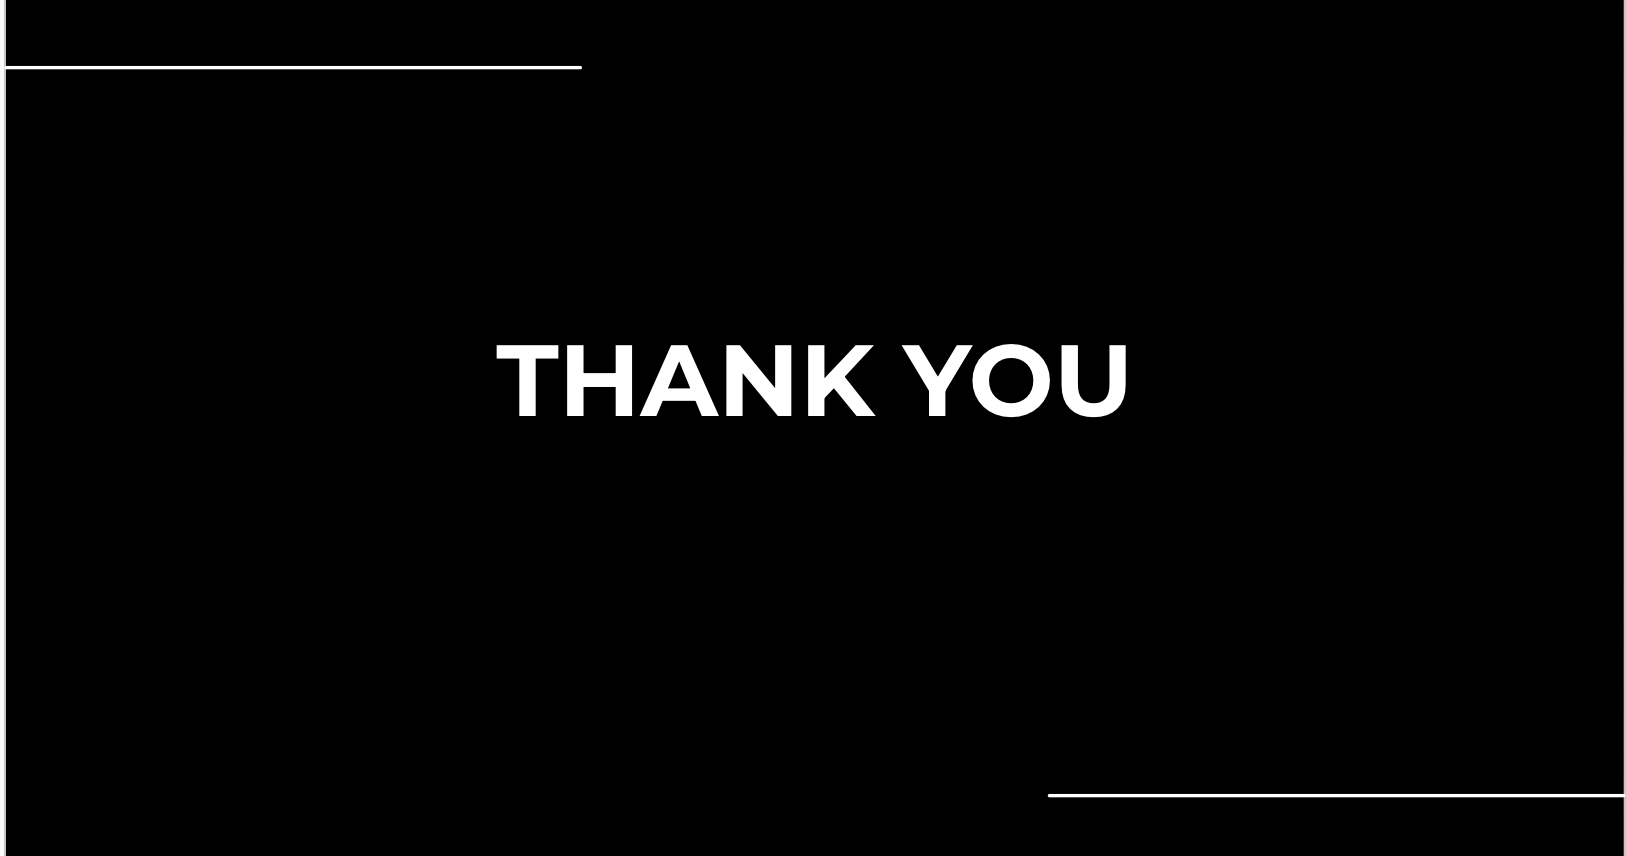